In [1]:
import pandas as pd
import numpy as np
from numpy import diff
import matplotlib.pyplot as plt
import re

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None #отключить варнинги на изменение оригинального датафрейма

### Здесь находятся все изменяемые глобальные переменные и гиперпараметры

Здесь можно изменить директорию с исходными датасетами

In [2]:
source_dir = ''#'F:/Project/csv/'

### Считываем все доступные исходные csv

In [3]:
rounds = pd.read_csv(source_dir + 'rounds.csv')
rounds = rounds.drop(['Index'], axis=1)
rounds.head(3)

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code
0,Arta Finance,05/11/2022,90000000,NaN,90000000.0,NaN,Series A,"Finance,Financial Services,Wealth Management",2,82.0,3.0,/organization/arta-finance,/funding_round/arta-finance-series-a--279f6b34
1,hC Bioscience,04/11/2022,16000000,NaN,40000000.0,"Panacea Venture,Taiho Ventures",Series A,"Biotechnology,Health Care,Life Science",2,2.0,2.0,/organization/hc-bioscience,/funding_round/hc-bioscience-series-a--d61399ca
2,Yes Hearing,04/11/2022,10000000,NaN,10000000.0,Blue Heron Capital,Series A,"Consumer,Health Care,Medical Device",2,5.0,1.0,/organization/yes-hearing,/funding_round/yes-hearing-series-a--3d34cf2e


In [4]:
ipos = pd.read_csv(source_dir + 'ipos.csv')
ipos = ipos.drop(['ID', 'RowNumber'], axis=1)
ipos.head(3)

,Organization Name,IPO Date,Exit Date,Valuation at IPO,Money Raised at IPO,Stock Exchange,Stock Symbol,IPO Status,Delisted Date,Total Funding Amount,Last Funding Date,Last Funding Amount,Last Funding Type,Founded Date,Estimated Revenue Range,Number of Employees,Headquarters Location,Industries,Description,Org_Code,Operation_Code,Currency
0,OmniAb,2022-11-02,2022-11-02,8.500000e+08,130000000.0,NASDAQ,OABI,Public,—,70000000,2022-11-02,NaN,Post-IPO Equity,1987-01-01,$1M to $10M,51-100,"Emeryville,California,United States","Biotechnology,Information Technology",Therapeutic antibody discovery,/organization/omniab,/ipo/omniab-ipo--f43d9ccb,$
1,Peak Bio,2022-11-02,2022-11-02,2.780000e+08,57500000.0,NASDAQ,PKBO,Public,—,25000000,2022-11-02,25000000.0,Post-IPO Equity,NaN,—,11-50,"Palo Alto,California,United States","Biopharma,Biotechnology",Peak Bio is a Biopharmaceutical company that focuses on the drug development to treat Oncology and Inflammatory diseases.,/organization/peak-bio,/ipo/peak-bio-ipo--f67eadbb,$
2,Prime Medicine,2022-10-20,2022-10-20,1.700000e+09,175000000.0,NASDAQ,PRME,Public,—,315000000,2021-07-13,200000000.0,Series B,2019-01-01,—,101-250,"Cambridge,Massachusetts,United States","Biotechnology,Genetics,Life Science,Medical",Prime Medicine operates as a biotechnology company that delivers the promise of gene editing using Prime Editing.,/organization/prime-medicine,/ipo/prime-medicine-ipo--b2c41880,$


In [5]:
acquisitions = pd.read_csv(source_dir + 'acquisitions.csv')
acquisitions = acquisitions.drop(['ID', 'RowNumber'], axis=1)
acquisitions.head(3)

,Acquiree Name,Announced Date,Acquirer Name,Price,Acquiree's Total Funding Amount,Acquisition Type,Acquisition Terms,Acquiree Funding Status,Acquiree Last Funding Type,Acquiree's Number of Funding Rounds,Acquiree's Estimated Revenue Range,Transaction Name,Org_Code,Acquirer_Code,Operation_Code,Currency
0,AavantiBio,2022-09-30,Solid Biosciences,NaN,107000000,Merger,—,M&A,Series A,1,—,AavantiBio acquired by Solid Biosciences,/organization/aavantibio,/organization/solid-biosciences,/acquisition/solid-biosciences-acquires-aavantibio--a5e12f6c,$
1,Knock,2022-09-30,RealPage,NaN,46718158,Acquisition,—,M&A,Venture - Series Unknown,6,—,Knock acquired by RealPage,/organization/knock-rentals,/organization/realpage,/acquisition/realpage-acquires-knock-rentals--f3a576eb,$
2,Ureeka,2022-09-30,ZenBusiness,NaN,16750000,Acquisition,—,M&A,Series A,2,—,Ureeka acquired by ZenBusiness,/organization/ureeka,/organization/zenbusiness,/acquisition/zenbusiness-acquires-ureeka--bd1baad6,$


In [6]:
closed = pd.read_csv(source_dir + 'closed.csv')
closed = closed.drop(['ID', 'RowNumber'], axis=1)
closed.head(3)

,Organization Name,Closed Date,Exit Date,Founded Date,Total Funding Amount,Last Funding Amount,Last Funding Type,Last Funding Date,Estimated Revenue Range,Number of Employees,Industries,Headquarters Location,Description,Org_Code,Currency
0,Mosh Holdings,2009-01-01,NaN,NaN,10000000,10000000.0,Series C,2013-09-27,—,—,"Banking,Consulting,Financial Services,Information Technology","Houston,Texas,United States",Mosh Holdings provides financial services and solutions for clients in the State of Texas.,/organization/mosh-holdings,$
1,Revolution Money,2009-01-01,2009-11-18,2007-01-01,107225000,15225000.0,Series D,2009-06-01,$10M to $50M,1-10,"Credit Cards,Debit Cards,Financial Services","St. Petersburg,Florida,United States","Revolution Money is a financial services company offering services such as credit cards,debit cards and money transfers.",/organization/revolutionmoney,$
2,Yack,2009-01-01,NaN,NaN,30700000,10200000.0,Series C,2000-09-19,—,1-10,"Construction,Event Management,Events,Internet","New York,New York,United States",Yack is an Internet publishing company which collects and aggregates information on rich media content.,/organization/yack-inc,$


### Фильтрация по привлеченным деньгам и оценке

In [7]:
len(rounds)

67412

In [8]:
filtered_rounds = rounds.loc[rounds['Money Raised'] >= 1000000]
filtered_rounds

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code
0,Arta Finance,05/11/2022,90000000,NaN,90000000.0,NaN,Series A,"Finance,Financial Services,Wealth Management",2,82.0,3.0,/organization/arta-finance,/funding_round/arta-finance-series-a--279f6b34
1,hC Bioscience,04/11/2022,16000000,NaN,40000000.0,"Panacea Venture,Taiho Ventures",Series A,"Biotechnology,Health Care,Life Science",2,2.0,2.0,/organization/hc-bioscience,/funding_round/hc-bioscience-series-a--d61399ca
2,Yes Hearing,04/11/2022,10000000,NaN,10000000.0,Blue Heron Capital,Series A,"Consumer,Health Care,Medical Device",2,5.0,1.0,/organization/yes-hearing,/funding_round/yes-hearing-series-a--3d34cf2e
3,Freedom Games,04/11/2022,10000000,NaN,10000000.0,Play Ventures,Seed,"Online Games,PC Games,Video Games",1,3.0,NaN,/organization/freedom-games-990e,/funding_round/freedom-games-990e-seed--438c1bb4
4,Rokid,04/11/2022,20000000,NaN,438300000.0,SDIC Capital,Series C,"Artificial Intelligence,Augmented Reality,Consumer Electronics,Human Computer Interaction,Robotics",8,1.0,NaN,/organization/rokid,/funding_round/rokid-series-c--238277a6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67407,Exa Corporation,01/04/1993,2400000,NaN,14279000.0,NaN,Venture - Series Unknown,"Aerospace,Manufacturing,Software",4,NaN,NaN,/organization/exa-corporation,/funding_round/exa-corporation-series-unknown--d1a64d4d
67408,Endius,01/12/1992,1100000,NaN,69100000.0,NaN,Seed,"Health Care,Manufacturing,Medical,Medical Device,Wellness",6,1.0,NaN,/organization/endius,/funding_round/endius-seed--31d3bdb9
67409,Grand Junction Networks,01/02/1992,7000000,NaN,15000000.0,NaN,Series A,"Information Technology,Internet,Network Hardware,Network Security,Telecommunications,Web Hosting",2,3.0,NaN,/organization/grand-junction-networks,/funding_round/grand-junction-networks-series-a--9d888046
67410,Intuit,01/09/1991,12000000,NaN,18851000.0,"Kleiner Perkins,Sierra Ventures,Technology Venture Investors",Series A,"Accounting,Financial Services,FinTech,PaaS,Software",3,3.0,NaN,/organization/intuit,/funding_round/intuit-series-a--8203b3e8


Список уникальных компаний из этого датасета

In [9]:
distinct_company = set(filtered_rounds['Organization Name'].values)
len(distinct_company)

24114

По айдишникам

In [10]:
distinct_uuid = set(filtered_rounds['Org_Code'].values)
len(distinct_uuid)

24280

In [11]:
# qwe = filtered_rounds.groupby(['Org_Code', 'Organization Name']).size().reset_index(name = 'count')
# qwer = qwe.groupby(['Organization Name']).size().reset_index(name = 'count')
# qwer = qwer.loc[qwer['count'] > 1] #180 повторений компаний (360+ разных компаний)
# filtered_rounds.loc[filtered_rounds['Organization Name'].isin(qwer['Organization Name'].values)].sort_values(by = ['Organization Name'])

### IPO

In [12]:
qwer = ipos.groupby(['Organization Name']).size().reset_index(name = 'count')
qwer = qwer.loc[qwer['count'] > 1]
a = ipos.loc[ipos['Organization Name'].isin(qwer['Organization Name'].values)].sort_values(by = ['Organization Name'])
#a.to_csv('dup_ipos.csv')
a

,Organization Name,IPO Date,Exit Date,Valuation at IPO,Money Raised at IPO,Stock Exchange,Stock Symbol,IPO Status,Delisted Date,Total Funding Amount,Last Funding Date,Last Funding Amount,Last Funding Type,Founded Date,Estimated Revenue Range,Number of Employees,Headquarters Location,Industries,Description,Org_Code,Operation_Code,Currency
2148,DASAN Zhone Solutions,2009-06-19,2009-06-19,NaN,NaN,NASDAQ,ZHNE,Delisted,"Sep 12,2016",500000000,1999-10-21,500000000.0,Series A,1999-01-01,—,251-500,"Oakland,California,United States","Communications Infrastructure,Hardware",DASAN Zhone Solutions develops telecommunication equipment for both emerging and established markets.,/organization/zhone-technologies,/ipo/zhone-technologies-ipo--4b37230c,$
2629,DASAN Zhone Solutions,2003-11-14,2003-11-14,NaN,NaN,NASDAQ,DZSI,Public,—,110400000,2021-01-26,64400000.0,Post-IPO Equity,1999-01-01,—,501-1000,"Oakland,California,United States",Broadcasting,DASAN Zhone Solutions is a global leader in network solutions for service provider and enterprise networks.,/organization/dasan-zhone,/ipo/dasan-zhone-ipo--68570778,$
1773,Independent Bank,2013-04-12,2013-04-12,NaN,83000000.0,NASDAQ,IBTX,Public,—,21000000,2016-11-30,21000000.0,Post-IPO Equity,1913-01-01,$500M to $1B,501-1000,"Mckinney,Texas,United States",Banking,"Independent Bank provides capital and guidance to foster growth,bring new ideas to life,and energize local businesses.",/organization/texas-independent-bank,/ipo/texas-independent-bank-ipo--6ed18764,$
3251,Independent Bank,1985-09-13,1985-09-13,NaN,NaN,NASDAQ,IBCP,Public,—,13400000,2013-09-10,13400000.0,Post-IPO Equity,1864-01-01,$10M to $50M,501-1000,"Mckinney,Texas,United States","Banking,Commercial,Finance,Financial Services,Lending,Online Auctions,Retail","Independent Bank offers financial services that include retail and commercial banking,mortgage lending,investments,and title services.",/organization/independent-bank,/ipo/independent-bank-ipo--2506d07f,$
3162,Wolfspeed,1993-02-19,1993-02-19,NaN,NaN,NASDAQ,WOLF,Public,—,30000000,2013-12-13,30000000.0,Grant,1987-07-14,$100M to $500M,10001+,"Durham,North Carolina,United States","Lighting,Semiconductor,Wireless",Wolfspeed is an innovator of LED lighting and semiconductor solutions for wireless and power applications.,/organization/cree,/ipo/cree-ipo--5b72445a,$
3163,Wolfspeed,1993-02-19,1993-02-19,NaN,NaN,NYSE - New York Stock Exchange,WOLF,Public,—,500000000,2022-01-31,500000000.0,Post-IPO Debt,1987-07-14,$100M to $500M,501-1000,"Durham,North Carolina,United States","Information Technology,Semiconductor,Wireless",Wolfspeed provider of the most field-tested SiC and GaN Power and RF solutions in the world.,/organization/wolfspeed,/ipo/wolfspeed-ipo--806091a3,$


In [13]:
qwer = ipos.groupby(['Org_Code']).size().reset_index(name = 'count')
qwer = qwer.loc[qwer['count'] > 1]
qwer

,Org_Code,count


In [14]:
len(ipos)

3359

In [15]:
filtered_ipos = ipos.loc[ipos['Org_Code'].isin(filtered_rounds['Org_Code'].values)]
filtered_ipos

,Organization Name,IPO Date,Exit Date,Valuation at IPO,Money Raised at IPO,Stock Exchange,Stock Symbol,IPO Status,Delisted Date,Total Funding Amount,Last Funding Date,Last Funding Amount,Last Funding Type,Founded Date,Estimated Revenue Range,Number of Employees,Headquarters Location,Industries,Description,Org_Code,Operation_Code,Currency
0,OmniAb,2022-11-02,2022-11-02,8.500000e+08,130000000.0,NASDAQ,OABI,Public,—,70000000,2022-11-02,NaN,Post-IPO Equity,1987-01-01,$1M to $10M,51-100,"Emeryville,California,United States","Biotechnology,Information Technology",Therapeutic antibody discovery,/organization/omniab,/ipo/omniab-ipo--f43d9ccb,$
2,Prime Medicine,2022-10-20,2022-10-20,1.700000e+09,175000000.0,NASDAQ,PRME,Public,—,315000000,2021-07-13,200000000.0,Series B,2019-01-01,—,101-250,"Cambridge,Massachusetts,United States","Biotechnology,Genetics,Life Science,Medical",Prime Medicine operates as a biotechnology company that delivers the promise of gene editing using Prime Editing.,/organization/prime-medicine,/ipo/prime-medicine-ipo--b2c41880,$
5,Atlis Motor Vehicles,2022-09-27,2022-09-27,NaN,NaN,NASDAQ,AMV,Public,—,69303826,2022-11-04,30000000.0,Private Equity,2016-11-09,Less than $1M,51-100,"Mesa,Arizona,United States","Automotive,Autonomous Vehicles,Electric Vehicle,Energy Storage",Atlis Motor Vehicles is a mobility technology company that designs and develops battery electric trucks and charging stations.,/organization/atlis-motor-vehicles,/ipo/atlis-motor-vehicles-ipo--3d11ac50,$
6,LiveWire,2022-09-27,2022-09-27,1.770000e+09,400000000.0,NYSE - New York Stock Exchange,LVWR,Public,—,300000000,2022-09-27,200000000.0,Post-IPO Equity,NaN,$1M to $10M,101-250,"Malibu,California,United States","Electric Vehicle,Industrial Manufacturing,Manufacturing",LiveWire is a trader and manufacturer of electric motorcycle.,/organization/livewire-d46a,/ipo/livewire-d46a-ipo--5d111b01,$
7,Presto,2022-09-22,2022-09-22,1.000000e+09,172500000.0,NASDAQ,PRST,Public,—,167500000,2022-09-22,70000000.0,Post-IPO Equity,2008-01-01,$1M to $10M,101-250,"Redwood City,California,United States","Enterprise Software,Food and Beverage,Restaurants,SaaS,Software",Presto is a leader in labor productivity solutions for hospitality businesses.,/organization/presto,/ipo/presto-ipo--9fba5ef0,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,Cadiz,1994-11-04,1994-11-04,NaN,NaN,NASDAQ,CDZI,Public,—,49340875,2022-03-21,12000000.0,Post-IPO Equity,1983-01-01,Less than $1M,1-10,"Los Angeles,California,United States","Natural Resources,Project Management,Renewable Energy,Water",Cadiz is a publicly-held natural resources company engaged in a combination of organic farming and sustainable water supply projects.,/organization/cadiz,/ipo/cadiz-ipo--109aaa4c,$
3156,Superconductor Technologies,1993-05-19,1993-05-19,NaN,NaN,NASDAQ,SCON,Public,—,12505186,2016-08-18,1605186.0,Convertible Note,1987-01-01,Less than $1M,11-50,"Austin,Texas,United States","Electronics,Manufacturing,Renewable Energy,Wireless","STI has pioneered the development of superconducting materials and manufacturing processes,developing numerous patents.",/organization/superconductor-technologies,/ipo/superconductor-technologies-ipo--505a9afd,$
3177,FuelCell Energy,1992-07-02,1992-07-02,NaN,NaN,NASDAQ,FCEL,Public,—,139425000,2022-02-24,6800000.0,Grant,1969-01-01,$10M to $50M,501-1000,"Danbury,Connecticut,United States","Energy,Fuel,Manufacturing,Renewable Energy","FuelCell Energy is an integrated fuel cell company that designs,manufactures,installs,services and operates",/organization/fuelcell-energy-inc,/ipo/fuelcell-energy-inc-ipo--6393497d,$
3244,Kaspien,1986-07-25,1986-07-25,NaN,NaN,NASDAQ,KSPN,Public,—,51700000,2022-07-12,8000000.0,Post-IPO Equity,1972-12-01,$100M to $500M,101-250,"Spokane,Washington,United States","E-Commerce,Retail,Software",Our mission is to optimize and grow brands on today’s leading online marketplaces.,/organization/kaspien,/ipo/kaspien-ipo--e

In [16]:
# new_ipos = ipos.fillna(0)
# qwer = new_ipos.groupby(['Organization Name']).size().reset_index(name = 'count')
# qwer = qwer.loc[qwer['count'] > 1]
# #283 уникальные компании должно остаться из дублей

# a = new_ipos.loc[new_ipos['Organization Name'].isin(qwer['Organization Name'].values)].sort_values(by = ['Organization Name'])
# #593 строки они составляют щас

# a.groupby(['Organization Name','Stock Symbol','IPO Status','Delisted Date','Exit Date']).size().reset_index(name = 'count')
# #ищем, по каким столбцам дублей нет - все 593 варианта на месте

# nulls = a.loc[a['Stock Symbol'] == 0] #283
# notnulls = a.loc[a['Stock Symbol'] != 0] #310
# nulls.loc[~nulls['Organization Name'].isin(notnulls['Organization Name'].values)] #пусто
# #notnulls.loc[~notnulls['Organization Name'].isin(nulls['Organization Name'].values)] #пусто
# #значит можно удалить все строки с 0, у каждой есть строчка без 0

# a = a.loc[a['Stock Symbol'] != 0]
# #теперь это 310 строк


# qwer = a.groupby(['Organization Name']).size().reset_index(name = 'count')
# qwer = qwer.loc[qwer['count'] > 1]
# #27 уникальных компаний должны остаться из дублей
# b = a.loc[a['Organization Name'].isin(qwer['Organization Name'].values)].sort_values(by = ['Organization Name'])
# #54 строки они составляют щас

# b.groupby(['Organization Name','Stock Symbol','IPO Status','Delisted Date','Exit Date']).size().reset_index(name = 'count')
# #ищем, по каким столбцам дублей нет - все 54 варианта на месте

# nulls = b.loc[b['Exit Date'] == 0] #27
# notnulls = b.loc[b['Exit Date'] != 0] #27
# nulls.loc[~nulls['Organization Name'].isin(notnulls['Organization Name'].values)] #пусто
# notnulls.loc[~notnulls['Organization Name'].isin(nulls['Organization Name'].values)] #пусто
# #значит можно удалить все строки с 0, у каждой есть строчка без 0

# b = b.loc[b['Exit Date'] != 0]
# #теперь это 27 строк

### Acquisitions

In [17]:
len(acquisitions)

6649

In [18]:
filtered_acquisitions = acquisitions.loc[acquisitions['Org_Code'].isin(filtered_rounds['Org_Code'].values)]
filtered_acquisitions

,Acquiree Name,Announced Date,Acquirer Name,Price,Acquiree's Total Funding Amount,Acquisition Type,Acquisition Terms,Acquiree Funding Status,Acquiree Last Funding Type,Acquiree's Number of Funding Rounds,Acquiree's Estimated Revenue Range,Transaction Name,Org_Code,Acquirer_Code,Operation_Code,Currency
0,AavantiBio,2022-09-30,Solid Biosciences,NaN,107000000,Merger,—,M&A,Series A,1,—,AavantiBio acquired by Solid Biosciences,/organization/aavantibio,/organization/solid-biosciences,/acquisition/solid-biosciences-acquires-aavantibio--a5e12f6c,$
1,Knock,2022-09-30,RealPage,NaN,46718158,Acquisition,—,M&A,Venture - Series Unknown,6,—,Knock acquired by RealPage,/organization/knock-rentals,/organization/realpage,/acquisition/realpage-acquires-knock-rentals--f3a576eb,$
2,Ureeka,2022-09-30,ZenBusiness,NaN,16750000,Acquisition,—,M&A,Series A,2,—,Ureeka acquired by ZenBusiness,/organization/ureeka,/organization/zenbusiness,/acquisition/zenbusiness-acquires-ureeka--bd1baad6,$
3,Aceragen,2022-09-28,Idera Pharmaceuticals,NaN,35000000,Acquisition,—,M&A,Private Equity,1,—,Aceragen acquired by Idera Pharmaceuticals,/organization/aceragen,/organization/idera-pharmaceuticals,/acquisition/idera-pharmaceuticals-acquires-aceragen--5d18ee54,$
4,Billtrust,2022-09-28,EQT,1.700000e+09,315000000,Acquisition,Cash,M&A,Post-IPO Equity,8,$100M to $500M,Billtrust acquired by EQT,/organization/billtrust,/organization/eqt-holdings,/acquisition/eqt-holdings-acquires-billtrust--87c6de67,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,Salary.com,2022-10-04,Accel-KKR,NaN,68500000,Acquisition,—,M&A,Private Equity,3,$10M to $50M,Salary.com acquired by Accel-KKR,/organization/salary-com,/organization/accel-kkr,/acquisition/accel-kkr-acquires-salary-com--27700d48,$
6645,Poshmark,2022-10-03,Naver,1.600000e+09,153000000,Acquisition,Cash & Stock,M&A,Venture - Series Unknown,7,$100M to $500M,Poshmark acquired by Naver,/organization/poshmark,/organization/naver-corporation,/acquisition/naver-corporation-acquires-poshmark--b1551893,$
6646,LogicBio Therapeutics,2022-10-03,Alexion Pharmaceuticals,7.000000e+07,69000000,Acquisition,Cash & Stock,M&A,Post-IPO Equity,5,$1M to $10M,LogicBio Therapeutics acquired by Alexion Pharmaceuticals,/organization/logicbio-therapeutics,/organization/alexion-pharmaceuticals,/acquisition/alexion-pharmaceuticals-acquires-logicbio-therapeutics--1b12e7b0,$
6647,Bswift,2022-10-03,Francisco Partners,NaN,51000000,Acquisition,—,M&A,Private Equity,1,$10M to $50M,Bswift acquired by Francisco Partners,/organization/bswift,/organization/francisco-partners,/acquisition/francisco-partners-acquires-bswift--0fbeea77,$


In [19]:
# # пока 6646 аквизишенов
# qwer = acquisitions.groupby(['Acquiree Name', 'Announced Date']).size().reset_index(name = 'count')
# qwer = qwer.loc[qwer['count'] > 1]
# #20 компаний

# a = acquisitions.loc[acquisitions['Acquiree Name'].isin(qwer['Acquiree Name'].values) & acquisitions['Announced Date'].isin(qwer['Announced Date'].values)].sort_values(by = ['Acquiree Name'])
# acquisitions = acquisitions.loc[~(acquisitions['Acquiree Name'].isin(qwer['Acquiree Name'].values) & acquisitions['Announced Date'].isin(qwer['Announced Date'].values))]
# #40 строк они составляют щас

# #a.to_csv('a.csv')
# a = pd.read_csv('a1.csv')
# a = a.drop(['Unnamed: 0'], axis=1)
# #20 уникальных строк

# acquisitions = pd.concat([acquisitions, a], ignore_index=True, sort=False)
# acquisitions


# qwer = acquisitions.groupby(['Acquiree Name']).size().reset_index(name = 'count')
# qwer = qwer.loc[qwer['count'] > 1]
# #390 случаев совпадений (831 строка)
# qwert = acquisitions.groupby(['Acquiree Name', "Acquiree's Total Funding Amount"]).size().reset_index(name = 'count')
# qwert = qwert.loc[qwert['count'] > 1]
# #385 случаев (компания одна, но имеет несколько продаж в истории) 821 строка

# # acquisitions.loc[acquisitions['Acquiree Name'].isin(qwer['Acquiree Name'].values) & (~acquisitions['Acquiree Name'].isin(qwert['Acquiree Name'].values))].sort_values(by = ['Acquiree Name'])
# # acquisitions.loc[acquisitions['Acquiree Name'].isin(['Whistle', 'Lively'])].sort_values(by = ['Acquiree Name'])

In [20]:
#filtered_acquisitions = filtered_acquisitions.drop(['Operation_Code'], axis=1)
filtered_acquisitions = filtered_acquisitions.drop_duplicates(subset=filtered_acquisitions.columns[:-2]).reset_index(drop=True)
len(filtered_acquisitions)

5984

In [21]:
qwer = filtered_acquisitions.groupby(['Org_Code', 'Announced Date']).size().reset_index(name = 'count')
qwer = qwer.loc[qwer['count'] > 1]
qwer

,Org_Code,Announced Date,count
169,/organization/affinivax,2022-05-31,2
328,/organization/aperio-technologies,2012-08-21,2
440,/organization/arxan-technologies,2020-04-15,2
822,/organization/bridgecrew,2021-02-16,2
1111,/organization/clarity-money,2018-04-15,2
1210,/organization/collabnet,2020-04-15,2
1991,/organization/finxera,2021-03-08,2
2039,/organization/flodesign-sonics,2019-10-10,2
2202,/organization/giphy,2020-05-15,2
2559,/organization/infer,2017-10-23,2


In [22]:
#a = filtered_acquisitions.loc[(filtered_acquisitions['Org_Code'].isin(qwer['Org_Code'].values)) & (filtered_acquisitions['Announced Date'].isin(qwer['Announced Date'].values))].sort_values(by = ['Acquiree Name'])
#a.to_csv('a.csv')
a = pd.read_csv('acq_remove.csv')
filtered_acquisitions = filtered_acquisitions.loc[~filtered_acquisitions['Operation_Code'].isin(a['Operation_Code'].values)]
len(filtered_acquisitions)

5967

Определим слишком зрелые для нашего датасета компании с историей вторичного рынка (слияний и перепродаж). При наличии в истории нескольких событий acquisition учитывать можно только первое по времени из этих событий. Если единственному событию acquisition предшествуют по времени другие события (из перечня ниже) - эта компания также признается слишком зрелой.

In [23]:
filtered_acquisitions['Announced Date'] = pd.to_datetime(filtered_acquisitions['Announced Date'])
filtered_acquisitions = filtered_acquisitions.loc[filtered_acquisitions.groupby(['Org_Code'])['Announced Date'].idxmin()]
len(filtered_acquisitions)

5531

Это список первых таких продаж в истории компаний. Выберем из них "неправильные" - не соответствующие типу "acquisition"

In [24]:
filtered_acquisitions.groupby(['Acquisition Type']).size().reset_index(name = 'count')

,Acquisition Type,count
0,Acquihire,33
1,Acquisition,4550
2,Leveraged Buyout,356
3,Management Buyout,9
4,Merger,166
5,—,417


In [25]:
filtered_acquisitions.loc[(filtered_acquisitions['Acquisition Type'].isin([np.nan]))]

,Acquiree Name,Announced Date,Acquirer Name,Price,Acquiree's Total Funding Amount,Acquisition Type,Acquisition Terms,Acquiree Funding Status,Acquiree Last Funding Type,Acquiree's Number of Funding Rounds,Acquiree's Estimated Revenue Range,Transaction Name,Org_Code,Acquirer_Code,Operation_Code,Currency


In [26]:
filtered_acquisitions = filtered_acquisitions.loc[(filtered_acquisitions['Acquisition Type'].isin(['Acquisition', '—'])) | ((filtered_acquisitions['Acquisition Type'] == 'Acquihire') & (~filtered_acquisitions['Price'].isin([np.nan])))]
filtered_acquisitions

,Acquiree Name,Announced Date,Acquirer Name,Price,Acquiree's Total Funding Amount,Acquisition Type,Acquisition Terms,Acquiree Funding Status,Acquiree Last Funding Type,Acquiree's Number of Funding Rounds,Acquiree's Estimated Revenue Range,Transaction Name,Org_Code,Acquirer_Code,Operation_Code,Currency
3041,10-4 Systems,2017-09-13,Trimble,NaN,13900000,Acquisition,—,M&A,Series A,2,$1M to $10M,10-4 Systems acquired by Trimble,/organization/10-4-systems,/organization/trimble,/acquisition/trimble-acquires-10-4-systems--3a974ff9,$
5298,100Plus,2021-08-24,Connect America,NaN,39750000,Acquisition,—,M&A,Seed,8,Less than $1M,100Plus acquired by Connect America,/organization/100plus,/organization/connect-america,/acquisition/connect-america-acquires-100plus--91d5c143,$
2035,1010data,2015-08-03,Advance,5.000000e+08,35000000,Acquisition,—,M&A,Venture - Series Unknown,1,$10M to $50M,1010data acquired by Advance,/organization/1010data,/organization/advance-91f0,/acquisition/advance-91f0-acquires-1010data--b241f8b1,$
5817,11 Honore,2022-06-01,Dia&Co,NaN,21500000,Acquisition,—,M&A,Series A,3,Less than $1M,11 Honore acquired by Dia&Co,/organization/11-honore,/organization/dia-co,/acquisition/dia-co-acquires-11-honore--883f9c84,$
4673,128 Technology,2020-10-19,Juniper Networks,4.500000e+08,96704295,Acquisition,—,M&A,Series D,6,$10M to $50M,128 Technology acquired by Juniper Networks,/organization/128-technology,/organization/juniper-networks,/acquisition/juniper-networks-acquires-128-technology--2e04c60c,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,Zyga Technology,2018-01-04,Surgalign,NaN,81500000,Acquisition,—,M&A,Series E,9,$1M to $10M,Zyga Technology acquired by Surgalign,/organization/zyga-technology,/organization/rti-surgical-inc,/acquisition/rti-surgical-inc-acquires-zyga-technology--94f4b675,$
2804,Zyme Solutions,2017-04-12,Insight Partners,1.000000e+08,12039999,Acquisition,—,M&A,Series B,4,$10M to $50M,Zyme Solutions acquired by Insight Partners,/organization/zyme-solutions,/organization/insight-partners,/acquisition/insight-partners-acquires-zyme-solutions--27bc9181,$
5880,Zymergen,2022-07-25,Ginkgo Bioworks,3.000000e+08,974140000,Acquisition,Stock,M&A,Series D,6,$100M to $500M,Zymergen acquired by Ginkgo Bioworks,/organization/zymergen,/organization/ginkgo-bioworks,/acquisition/ginkgo-bioworks-acquires-zymergen--e17bcf46,$
5614,Zynga,2022-01-10,Take-Two Interactive Software,1.270000e+10,2318550786,Acquisition,Cash,M&A,Post-IPO Equity,12,$1B to $10B,Zynga acquired by Take-Two Interactive Software,/organization/zynga,/organization/take-two-interactive-software,/acquisition/take-two-interactive-software-acquires-zynga--8106dcd3,$


### Closed

In [27]:
len(closed)

1097

In [28]:
filtered_closed = closed.loc[closed['Org_Code'].isin(filtered_rounds['Org_Code'].values)]
filtered_closed

,Organization Name,Closed Date,Exit Date,Founded Date,Total Funding Amount,Last Funding Amount,Last Funding Type,Last Funding Date,Estimated Revenue Range,Number of Employees,Industries,Headquarters Location,Description,Org_Code,Currency
0,Mosh Holdings,2009-01-01,NaN,NaN,10000000,10000000.0,Series C,2013-09-27,—,—,"Banking,Consulting,Financial Services,Information Technology","Houston,Texas,United States",Mosh Holdings provides financial services and solutions for clients in the State of Texas.,/organization/mosh-holdings,$
1,Revolution Money,2009-01-01,2009-11-18,2007-01-01,107225000,15225000.0,Series D,2009-06-01,$10M to $50M,1-10,"Credit Cards,Debit Cards,Financial Services","St. Petersburg,Florida,United States","Revolution Money is a financial services company offering services such as credit cards,debit cards and money transfers.",/organization/revolutionmoney,$
2,Yack,2009-01-01,NaN,NaN,30700000,10200000.0,Series C,2000-09-19,—,1-10,"Construction,Event Management,Events,Internet","New York,New York,United States",Yack is an Internet publishing company which collects and aggregates information on rich media content.,/organization/yack-inc,$
3,Reliant Technologies,2009-01-01,2009-07-07,2001-01-01,58500000,15000000.0,Series E,2007-04-19,—,51-100,"Biotechnology,Health Care,Laser,Medical","Mountain View,California,United States","Reliant Technologies,LLC develops aesthetic clinical solutions to rejuvenate aging and environmentally damaged skin.",/organization/reliant-technologies,$
4,Proteolix,2009-01-01,2009-10-12,2003-01-01,142300000,79000000.0,Series C,2008-09-08,—,10001+,"Biopharma,Biotechnology,Health Care,Pharmaceutical","South San Francisco,California,United States",Onyx Pharmaceuticals (NASDAQ: ONXX) is a biopharmaceutical company engaged in the development and commercialization of innovative therapies,/organization/proteolix,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,Modsy,2022-07-01,NaN,2015-01-01,72655000,37000000.0,Series C,2019-05-21,$1M to $10M,251-500,"3D Technology,Home Decor,Home Renovation,Personalization","San Francisco,California,United States","Modsy combines advanced 3D graphics,computer vision,and creative curation to provide its customers with home design guidance and plans.",/organization/modsy-2,$
1092,WanderJaunt,2022-07-01,NaN,2016-10-01,26000000,NaN,Venture - Series Unknown,2021-04-01,—,101-250,"Property Management,Rental Property,Travel Accommodations","San Francisco,California,United States","WanderJaunt offers technology-enabled property management solutions for travelers,homeowners,and accommodations from around the world.",/organization/wanderjaunt,$
1094,Reali,2022-08-01,NaN,2016-08-01,292375979,175000000.0,Debt Financing,2021-08-18,$1M to $10M,101-250,"Consumer Lending,Finance,FinTech,Lending,Real Estate","San Mateo,California,United States","Reali is a real estate and fintech company that is creating a one-stop-shop to make homeownership simple,affordable and stress-free.",/organization/reali,$
1095,Edmodo,2022-08-01,2018-04-08,2008-09-02,77500000,NaN,Venture - Series Unknown,2015-09-06,$1M to $10M,51-100,"Blogging Platforms,EdTech,Education,Social Media","San Mateo,California,United States",Edmodo is a global education network that connects all learners with the people and resources they need to reach their full potential.,/organization/edmodo,$


In [29]:
qwer = filtered_closed.groupby(['Org_Code']).size().reset_index(name = 'count')
qwer = qwer.loc[qwer['count'] > 1]
qwer

,Org_Code,count


### Анализ прошедшего времени от последнего раунда до выхода

In [30]:
filtered_closed['Closed Date'] = pd.to_datetime(filtered_closed['Closed Date'])
filtered_closed['Last Funding Date'] = pd.to_datetime(filtered_closed['Last Funding Date'])
rounds_to_close = filtered_closed.loc[filtered_closed['Closed Date'] >= filtered_closed['Last Funding Date']]
rounds_to_close['date_dif'] = rounds_to_close['Closed Date'] - rounds_to_close['Last Funding Date']
rounds_to_close

,Organization Name,Closed Date,Exit Date,Founded Date,Total Funding Amount,Last Funding Amount,Last Funding Type,Last Funding Date,Estimated Revenue Range,Number of Employees,Industries,Headquarters Location,Description,Org_Code,Currency,date_dif
2,Yack,2009-01-01,NaN,NaN,30700000,10200000.0,Series C,2000-09-19,—,1-10,"Construction,Event Management,Events,Internet","New York,New York,United States",Yack is an Internet publishing company which collects and aggregates information on rich media content.,/organization/yack-inc,$,3026 days
3,Reliant Technologies,2009-01-01,2009-07-07,2001-01-01,58500000,15000000.0,Series E,2007-04-19,—,51-100,"Biotechnology,Health Care,Laser,Medical","Mountain View,California,United States","Reliant Technologies,LLC develops aesthetic clinical solutions to rejuvenate aging and environmentally damaged skin.",/organization/reliant-technologies,$,623 days
4,Proteolix,2009-01-01,2009-10-12,2003-01-01,142300000,79000000.0,Series C,2008-09-08,—,10001+,"Biopharma,Biotechnology,Health Care,Pharmaceutical","South San Francisco,California,United States",Onyx Pharmaceuticals (NASDAQ: ONXX) is a biopharmaceutical company engaged in the development and commercialization of innovative therapies,/organization/proteolix,$,115 days
5,Touchdown Technologies,2009-01-01,2009-06-05,2003-01-01,55213000,22063000.0,Series D,2008-02-25,—,11-50,"Information Technology,Manufacturing,Semiconductor","Baldwin Park,California,United States","Touchdown Technologies designs,manufactures,and supports MEMS probe cards to be used in the production of semiconductors.",/organization/touchdown-technologies,$,311 days
6,Bigfoot Interactive,2009-01-01,2005-09-08,1997-01-01,26000000,6000000.0,Series C,2002-01-23,Less than $1M,51-100,"Advertising,Computer,Consulting,Consumer Electronics,CRM,Electronics,Email Marketing,Information Technology,Marketing,Software","New York,New York,United States",Bigfoot Interactive provides electronic marketing solutions.,/organization/bigfoot-interactive,$,2535 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,Modsy,2022-07-01,NaN,2015-01-01,72655000,37000000.0,Series C,2019-05-21,$1M to $10M,251-500,"3D Technology,Home Decor,Home Renovation,Personalization","San Francisco,California,United States","Modsy combines advanced 3D graphics,computer vision,and creative curation to provide its customers with home design guidance and plans.",/organization/modsy-2,$,1137 days
1092,WanderJaunt,2022-07-01,NaN,2016-10-01,26000000,NaN,Venture - Series Unknown,2021-04-01,—,101-250,"Property Management,Rental Property,Travel Accommodations","San Francisco,California,United States","WanderJaunt offers technology-enabled property management solutions for travelers,homeowners,and accommodations from around the world.",/organization/wanderjaunt,$,456 days
1094,Reali,2022-08-01,NaN,2016-08-01,292375979,175000000.0,Debt Financing,2021-08-18,$1M to $10M,101-250,"Consumer Lending,Finance,FinTech,Lending,Real Estate","San Mateo,California,United States","Reali is a real estate and fintech company that is creating a one-stop-shop to make homeownership simple,affordable and stress-free.",/organization/reali,$,348 days
1095,Edmodo,2022-08-01,2018-04-08,2008-09-02,77500000,NaN,Venture - Series Unknown,2015-09-06,$1M to $10M,51-100,"Blogging Platforms,EdTech,Education,Social Media","San Mateo,California,United States",Edmodo is a global education network that connects all learners with the people and resources they need to reach their full potential.,/organization/edmodo,$,2521 days


In [31]:
rounds_to_close['date_dif'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

count                             975
mean     1299 days 09:52:14.769230768
std      1436 days 15:01:06.673923088
min                   0 days 00:00:00
1%                   24 days 23:02:24
10%                 209 days 09:36:00
20%                 361 days 14:24:00
30%                 517 days 04:48:00
40%                 670 days 00:00:00
50%                 854 days 00:00:00
60%                1058 days 09:36:00
70%                1315 days 19:12:00
80%                1818 days 14:24:00
90%                2895 days 14:24:00
99%                6942 days 02:52:48
max                7810 days 00:00:00
Name: date_dif, dtype: object

In [32]:
rounds_to_close['date_dif'].value_counts(bins=86).sort_index() #подобрано под 91-дневные бины

(-8 days +04:33:35.999999999, 90 days 19:32:05.581395349]       34
(90 days 19:32:05.581395349, 181 days 15:04:11.162790698]       52
(181 days 15:04:11.162790698, 272 days 10:36:16.744186048]      49
(272 days 10:36:16.744186048, 363 days 06:08:22.325581396]      62
(363 days 06:08:22.325581396, 454 days 01:40:27.906976744]      55
                                                                ..
(7355 days 22:19:32.093023232, 7446 days 17:51:37.674418560]     0
(7446 days 17:51:37.674418560, 7537 days 13:23:43.255814016]     0
(7537 days 13:23:43.255814016, 7628 days 08:55:48.837209344]     0
(7628 days 08:55:48.837209344, 7719 days 04:27:54.418604672]     1
(7719 days 04:27:54.418604672, 7810 days 00:00:00]               2
Name: date_dif, Length: 86, dtype: int64

In [33]:
aaa = list(np.cumsum(rounds_to_close['date_dif'].value_counts(bins=86).sort_index()))
newList = [x / 9.75 for x in aaa]
distrib_plot_percent = pd.DataFrame({'quartal': list(range(1, 87)), 'percent': newList})
distrib_plot_percent#.to_csv('tableau_plot1.csv', index=False, encoding = 'utf-8-sig')

,quartal,percent
0,1,3.487179
1,2,8.820513
2,3,13.846154
3,4,20.205128
4,5,25.846154
...,...,...
81,82,99.692308
82,83,99.692308
83,84,99.692308
84,85,99.794872


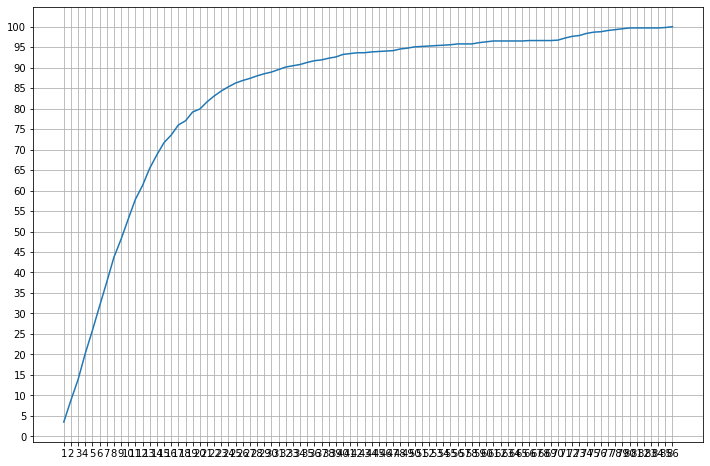

In [34]:
aaa = list(np.cumsum(rounds_to_close['date_dif'].value_counts(bins=86).sort_index()))
newList = [x / 9.75 for x in aaa]
plt.figure(figsize=(12,8))
plt.plot(list(range(1, 87)), newList)
plt.yticks(np.arange(0,105,5))
plt.xticks(np.arange(1,87,1))
plt.grid(which='both')

In [35]:
a = list(rounds_to_close['date_dif'].value_counts(bins=86).sort_index())
b = diff(a)
b

array([ 18,  -3,  13,  -7,   3,  -1,   2, -16,   5,  -1, -14,   8,  -9,
        -3, -11,   6, -14,  11, -14,  10,  -3,  -2,  -2,  -1,  -3,  -1,
         1,  -1,  -1,   2,   0,  -3,   0,   2,  -1,  -2,   2,  -1,   3,
        -4,   0,  -2,   2,  -1,   0,   0,   3,  -2,   1,  -2,   0,   0,
         0,   0,   1,  -2,   0,   3,  -1,   0,  -2,   0,   0,   0,   1,
        -1,   0,   0,   1,   4,  -1,  -2,   3,  -2,  -2,   2,  -1,   0,
         0,  -2,   0,   0,   0,   1,   1])

<BarContainer object of 86 artists>

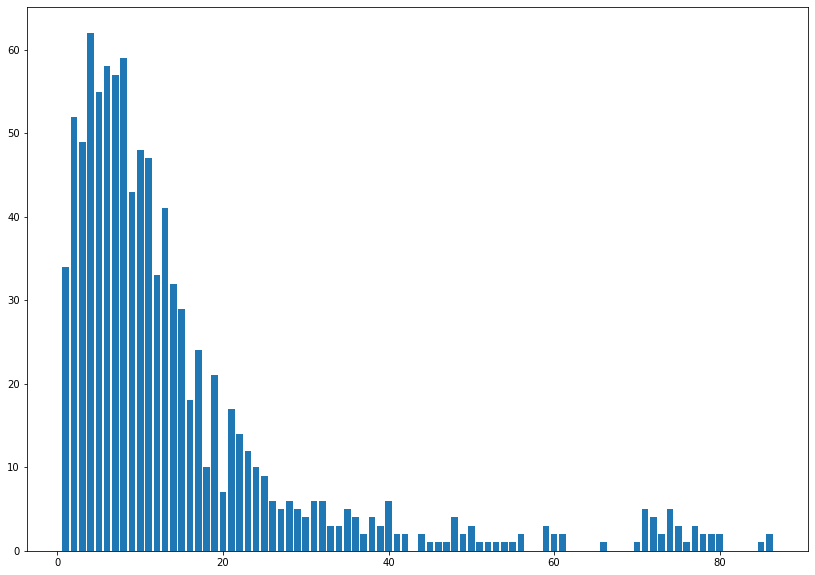

In [36]:
plt.figure(figsize=(14,10))
plt.bar(list(range(1, 87)), a)

In [37]:
distrib_plot_count = pd.DataFrame({'quartal': list(range(1, 87)), 'count': a})
distrib_plot_count#.to_csv('tableau_plot2.csv', index=False, encoding = 'utf-8-sig')

,quartal,count
0,1,34
1,2,52
2,3,49
3,4,62
4,5,55
...,...,...
81,82,0
82,83,0
83,84,0
84,85,1


### Exits

Дополним датасеты с IPO и acquisitions двумя столбцами - exit_date и exit_type ('ipo' для IPO и 'sold' для любых типов acquisition). Для этого создадим таблицу экзитов

In [38]:
filtered_ipos['IPO Date'] = pd.to_datetime(filtered_ipos['IPO Date'])
filtered_acquisitions['Announced Date'] = pd.to_datetime(filtered_acquisitions['Announced Date'])
filtered_ipos['exit_type'] = 'ipo'
filtered_acquisitions['exit_type'] = 'sold'

exits = pd.concat([filtered_ipos[['Org_Code', 'IPO Date', 'exit_type', 'Valuation at IPO', 'Money Raised at IPO', 'Total Funding Amount']].rename(columns={'IPO Date':'exit_date', 'Valuation at IPO':'Valuation', 'Money Raised at IPO':'Raised Money', 'Total Funding Amount':'Funding Amount'}), filtered_acquisitions[['Org_Code', 'Announced Date', 'exit_type', 'Price', "Acquiree's Total Funding Amount"]].rename(columns={'Announced Date':'exit_date', 'Price':'Valuation', "Acquiree's Total Funding Amount":'Funding Amount'})], axis=0, ignore_index=True)
exits

,Org_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
0,/organization/omniab,2022-11-02,ipo,8.500000e+08,130000000.0,70000000
1,/organization/prime-medicine,2022-10-20,ipo,1.700000e+09,175000000.0,315000000
2,/organization/atlis-motor-vehicles,2022-09-27,ipo,NaN,NaN,69303826
3,/organization/livewire-d46a,2022-09-27,ipo,1.770000e+09,400000000.0,300000000
4,/organization/presto,2022-09-22,ipo,1.000000e+09,172500000.0,167500000
...,...,...,...,...,...,...
6803,/organization/zyga-technology,2018-01-04,sold,NaN,NaN,81500000
6804,/organization/zyme-solutions,2017-04-12,sold,1.000000e+08,NaN,12039999
6805,/organization/zymergen,2022-07-25,sold,3.000000e+08,NaN,974140000
6806,/organization/zynga,2022-01-10,sold,1.270000e+10,NaN,2318550786


Проверим наличие двух и более сделок разного типа (и ipo, и sold) для одной компании

In [39]:
a = exits.groupby(['Org_Code']).size().reset_index(name = 'count')
a = a.loc[a['count']>1]
exits.loc[exits['Org_Code'].isin(a['Org_Code'].values)].sort_values(by = ['Org_Code', 'exit_date'])

,Org_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
1679,/organization/21st-century-oncology,2004-06-18,ipo,NaN,71500000.0,325000000
1840,/organization/21st-century-oncology,2019-12-16,sold,NaN,NaN,325000000
1158,/organization/2u,2014-03-28,ipo,5.086944e+08,119275000.0,426875000
1844,/organization/2u,2019-11-05,sold,NaN,NaN,426875000
1513,/organization/3par,2007-11-16,ipo,NaN,105000000.0,153000000
...,...,...,...,...,...,...
6802,/organization/zulily,2015-08-17,sold,2.400000e+09,NaN,194600000
318,/organization/zymergen,2021-04-22,ipo,3.000000e+09,500000000.0,974140000
6805,/organization/zymergen,2022-07-25,sold,3.000000e+08,NaN,974140000
1368,/organization/zynga,2011-12-16,ipo,NaN,NaN,2318550786


In [40]:
len(set(a['Org_Code'].values))

384

In [41]:
exits = exits.loc[exits.groupby(['Org_Code'])['exit_date'].idxmin()]
exits

,Org_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
1833,/organization/10-4-systems,2017-09-13,sold,NaN,NaN,13900000
1834,/organization/100plus,2021-08-24,sold,NaN,NaN,39750000
1835,/organization/1010data,2015-08-03,sold,5.000000e+08,NaN,35000000
598,/organization/10x-genomics,2019-09-11,ipo,3.660000e+09,390000000.0,242600000
1836,/organization/11-honore,2022-06-01,sold,NaN,NaN,21500000
...,...,...,...,...,...,...
6804,/organization/zyme-solutions,2017-04-12,sold,1.000000e+08,NaN,12039999
318,/organization/zymergen,2021-04-22,ipo,3.000000e+09,500000000.0,974140000
988,/organization/zynerba-pharmaceuticals,2015-08-04,ipo,NaN,42000000.0,13000000
1368,/organization/zynga,2011-12-16,ipo,NaN,NaN,2318550786


Удалим все раунды, которые были совершены после экзита, если таковой был

In [42]:
filtered_rounds_with_exits = filtered_rounds.merge(exits, how = 'left', on = 'Org_Code')
filtered_rounds_with_exits

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
0,Arta Finance,05/11/2022,90000000,NaN,90000000.0,NaN,Series A,"Finance,Financial Services,Wealth Management",2,82.0,3.0,/organization/arta-finance,/funding_round/arta-finance-series-a--279f6b34,NaT,NaN,NaN,NaN,NaN
1,hC Bioscience,04/11/2022,16000000,NaN,40000000.0,"Panacea Venture,Taiho Ventures",Series A,"Biotechnology,Health Care,Life Science",2,2.0,2.0,/organization/hc-bioscience,/funding_round/hc-bioscience-series-a--d61399ca,NaT,NaN,NaN,NaN,NaN
2,Yes Hearing,04/11/2022,10000000,NaN,10000000.0,Blue Heron Capital,Series A,"Consumer,Health Care,Medical Device",2,5.0,1.0,/organization/yes-hearing,/funding_round/yes-hearing-series-a--3d34cf2e,NaT,NaN,NaN,NaN,NaN
3,Freedom Games,04/11/2022,10000000,NaN,10000000.0,Play Ventures,Seed,"Online Games,PC Games,Video Games",1,3.0,NaN,/organization/freedom-games-990e,/funding_round/freedom-games-990e-seed--438c1bb4,NaT,NaN,NaN,NaN,NaN
4,Rokid,04/11/2022,20000000,NaN,438300000.0,SDIC Capital,Series C,"Artificial Intelligence,Augmented Reality,Consumer Electronics,Human Computer Interaction,Robotics",8,1.0,NaN,/organization/rokid,/funding_round/rokid-series-c--238277a6,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67401,Exa Corporation,01/04/1993,2400000,NaN,14279000.0,NaN,Venture - Series Unknown,"Aerospace,Manufacturing,Software",4,NaN,NaN,/organization/exa-corporation,/funding_round/exa-corporation-series-unknown--d1a64d4d,2012-06-28,ipo,131931610.0,62500000.0,14279000.0
67402,Endius,01/12/1992,1100000,NaN,69100000.0,NaN,Seed,"Health Care,Manufacturing,Medical,Medical Device,Wellness",6,1.0,NaN,/organization/endius,/funding_round/endius-seed--31d3bdb9,NaT,NaN,NaN,NaN,NaN
67403,Grand Junction Networks,01/02/1992,7000000,NaN,15000000.0,NaN,Series A,"Information Technology,Internet,Network Hardware,Network Security,Telecommunications,Web Hosting",2,3.0,NaN,/organization/grand-junction-networks,/funding_round/grand-junction-networks-series-a--9d888046,NaT,NaN,NaN,NaN,NaN
67404,Intuit,01/09/1991,12000000,NaN,18851000.0,"Kleiner Perkins,Sierra Ventures,Technology Venture Investors",Series A,"Accounting,Financial Services,FinTech,PaaS,Software",3,3.0,NaN,/organization/intuit,/funding_round/intuit-series-a--8203b3e8,2017-05-26,ipo,NaN,NaN,18851000.0


Посмотрим на раунды, которые были совершены позже IPO

In [43]:
filtered_rounds_with_exits['Announced Date'] = pd.to_datetime(filtered_rounds_with_exits['Announced Date'], format='%d/%m/%Y')
rounds_after_ipo = filtered_rounds_with_exits.loc[((filtered_rounds_with_exits['exit_type'] == 'ipo') & (filtered_rounds_with_exits['Announced Date'] > filtered_rounds_with_exits['exit_date']))]
rounds_after_ipo

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
80,Coresite,2022-10-28,570000000,NaN,670504000.0,Stonepeak,Private Equity,"Enterprise Software,Government,Information Technology,Internet,Service Industry",3,1.0,NaN,/organization/coresite,/funding_round/coresite-private-equity--8f7b9f7f,2010-09-23,ipo,NaN,270000000.0,670504000.0
135,Digital Ally,2022-10-25,15000000,NaN,50906628.0,NaN,Venture - Series Unknown,"Developer Tools,Hardware,Industrial",6,NaN,NaN,/organization/digital-ally,/funding_round/digital-ally-series-unknown--40969bac,2007-08-03,ipo,NaN,NaN,50906628.0
336,Mavenir,2022-10-04,155000000,NaN,854600000.0,"Koch Strategic Platforms,Siris Capital Group",Private Equity,"Cloud Infrastructure,Communications Infrastructure,Software,Telecommunications",8,2.0,2.0,/organization/mavenir,/funding_round/mavenir-private-equity--791481c1,2013-11-07,ipo,2.311426e+08,54500000.0,854600000.0
503,AvePoint,2022-09-21,1550000,NaN,431550000.0,NaN,Venture - Series Unknown,"Cloud Computing,Document Management,Information Technology,SaaS,Software",5,NaN,NaN,/organization/avepoint,/funding_round/avepoint-series-unknown--dd00f69b,2021-07-02,ipo,2.000000e+09,352000000.0,431550000.0
654,Inspire Semiconductor,2022-09-09,12800310,NaN,12800310.0,NaN,Venture - Series Unknown,"Blockchain,Computer,Cryptocurrency,Information Technology,Machine Learning,Semiconductor",1,NaN,NaN,/organization/inspire-semiconductor,/funding_round/inspire-semiconductor-series-unknown--e9ed8d1c,2021-10-01,ipo,NaN,NaN,13668879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61641,Real Media,2003-09-26,15000000,NaN,52000000.0,NaN,Convertible Note,"Advertising,Digital Entertainment,Marketing,News,Social Media",3,NaN,NaN,/organization/real-media,/funding_round/real-media-convertible-note--3e576647,1998-08-14,ipo,2.100000e+08,45500000.0,52000000.0
63006,Onyx Pharmaceuticals,2002-05-09,20000000,NaN,20000000.0,NaN,Venture - Series Unknown,"Biotechnology,Medical",2,4.0,NaN,/organization/onyx-pharmaceuticals,/funding_round/onyx-pharmaceuticals-series-unknown--5541933f,1999-07-13,ipo,NaN,NaN,20000000.0
63448,Aradigm,2001-12-13,48400000,NaN,75508777.0,NaN,Convertible Note,"Biotechnology,Health Care,Pharmaceutical",3,4.0,NaN,/organization/aradigm,/funding_round/aradigm-convertible-note--df6b2df2,1996-06-28,ipo,NaN,NaN,75508777.0
64107,drugstore.com,2001-04-01,63000000,NaN,63000000.0,NaN,Private Equity,"Beauty,Consumer Goods,E-Commerce,Health Care,Retail",1,3.0,NaN,/organization/drugstore-com,/funding_round/drugstore-com-private-equity--9b59a73a,1999-07-28,ipo,NaN,NaN,63000000.0


In [44]:
set(rounds_after_ipo['Funding Type'].values)

{'Convertible Note',
 'Funding Round',
 'Pre-Seed',
 'Private Equity',
 'Series A',
 'Series B',
 'Series C',
 'Venture - Series Unknown'}

In [45]:
len(set(rounds_after_ipo['Org_Code'].values))

90

In [46]:
rounds_after_acq = filtered_rounds_with_exits.loc[((filtered_rounds_with_exits['exit_type'] == 'sold') & (filtered_rounds_with_exits['Announced Date'] > filtered_rounds_with_exits['exit_date']))]
rounds_after_acq

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
70,AHEAD,2022-11-01,25918137,NaN,42656674.0,NaN,Venture - Series Unknown,"Cloud Computing,Information Technology,Software,Staffing Agency,Virtualization",2,NaN,NaN,/organization/ahead-2,/funding_round/ahead-2-series-unknown--3d37c612,2020-09-02,sold,NaN,NaN,16738537.0
459,Spa Space,2022-09-23,10000000,NaN,13000000.0,CI Capital Partners,Private Equity,"Scheduling,Software",2,1.0,NaN,/organization/spa-space,/funding_round/spa-space-private-equity--8d4d7c78,2022-09-12,sold,NaN,NaN,13000000.0
1027,Montana Renewables,2022-08-05,250000000,2.000000e+09,550000000.0,Warburg Pincus,Private Equity,Oil and Gas,2,1.0,1.0,/organization/montana-refining-company,/funding_round/montana-refining-company-private-equity--e2a5da50,2012-10-01,sold,NaN,NaN,550000000.0
1099,Ergotron,2022-07-29,287500000,NaN,287500000.0,The Sterling Group,Private Equity,"Hardware,Manufacturing,Software",1,1.0,NaN,/organization/ergotron,/funding_round/ergotron-private-equity--9fc1f127,2010-12-03,sold,NaN,NaN,287500000.0
1656,Corvia Medical,2022-06-09,54000000,NaN,119412483.0,NaN,Venture - Series Unknown,"Biopharma,Health Care,Medical Device",6,NaN,NaN,/organization/dc-devices,/funding_round/dc-devices-series-unknown--a21920c3,2019-03-11,sold,35000000.0,NaN,119412483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,One Call Care Management,2010-05-24,20000000,NaN,20000000.0,Norwest Mezzanine Partners,Venture - Series Unknown,"Health Care,Insurance,Medical",1,1.0,NaN,/organization/one-call-care-management,/funding_round/one-call-care-management-series-unknown--9dc18361,2009-12-14,sold,NaN,NaN,20000000.0
50990,Optics 1,2010-01-21,38000000,NaN,38000000.0,United States Navy,Venture - Series Unknown,"Biotechnology,Consumer Electronics,Industrial,Manufacturing,Medical",1,1.0,NaN,/organization/optics,/funding_round/optics-series-unknown--9e307d50,2009-12-02,sold,NaN,NaN,38000000.0
51185,Free & Clear,2010-01-01,10000000,NaN,10000000.0,NaN,Venture - Series Unknown,"Health Care,Medical,Wellness",1,3.0,1.0,/organization/free-clear,/funding_round/free-clear-series-unknown--eb1ca9c3,2009-09-22,sold,NaN,NaN,10000000.0
52256,PacketVideo,2009-07-06,45500000,NaN,243000000.0,NTT DoCoMo,Venture - Series Unknown,"Software,Video,Wireless",7,1.0,NaN,/organization/packetvideo,/funding_round/packetvideo-series-unknown--7adc7a95,2009-07-05,sold,157100000.0,NaN,243000000.0


In [47]:
set(rounds_after_acq['Funding Type'].values)

{'Convertible Note',
 'Funding Round',
 'Pre-Seed',
 'Private Equity',
 'Seed',
 'Series A',
 'Series B',
 'Series C',
 'Series D',
 'Series E',
 'Venture - Series Unknown'}

In [48]:
len(set(rounds_after_acq['Org_Code'].values))

209

In [49]:
filtered_rounds_with_exits = filtered_rounds_with_exits.loc[~((filtered_rounds_with_exits['exit_type'] == 'ipo') & (filtered_rounds_with_exits['Announced Date'] > filtered_rounds_with_exits['exit_date']))]
filtered_rounds_with_exits = filtered_rounds_with_exits.loc[~((filtered_rounds_with_exits['exit_type'] == 'sold') & (filtered_rounds_with_exits['Announced Date'] > filtered_rounds_with_exits['exit_date']))]
filtered_rounds_with_exits

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
0,Arta Finance,2022-11-05,90000000,NaN,90000000.0,NaN,Series A,"Finance,Financial Services,Wealth Management",2,82.0,3.0,/organization/arta-finance,/funding_round/arta-finance-series-a--279f6b34,NaT,NaN,NaN,NaN,NaN
1,hC Bioscience,2022-11-04,16000000,NaN,40000000.0,"Panacea Venture,Taiho Ventures",Series A,"Biotechnology,Health Care,Life Science",2,2.0,2.0,/organization/hc-bioscience,/funding_round/hc-bioscience-series-a--d61399ca,NaT,NaN,NaN,NaN,NaN
2,Yes Hearing,2022-11-04,10000000,NaN,10000000.0,Blue Heron Capital,Series A,"Consumer,Health Care,Medical Device",2,5.0,1.0,/organization/yes-hearing,/funding_round/yes-hearing-series-a--3d34cf2e,NaT,NaN,NaN,NaN,NaN
3,Freedom Games,2022-11-04,10000000,NaN,10000000.0,Play Ventures,Seed,"Online Games,PC Games,Video Games",1,3.0,NaN,/organization/freedom-games-990e,/funding_round/freedom-games-990e-seed--438c1bb4,NaT,NaN,NaN,NaN,NaN
4,Rokid,2022-11-04,20000000,NaN,438300000.0,SDIC Capital,Series C,"Artificial Intelligence,Augmented Reality,Consumer Electronics,Human Computer Interaction,Robotics",8,1.0,NaN,/organization/rokid,/funding_round/rokid-series-c--238277a6,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67401,Exa Corporation,1993-04-01,2400000,NaN,14279000.0,NaN,Venture - Series Unknown,"Aerospace,Manufacturing,Software",4,NaN,NaN,/organization/exa-corporation,/funding_round/exa-corporation-series-unknown--d1a64d4d,2012-06-28,ipo,131931610.0,62500000.0,14279000.0
67402,Endius,1992-12-01,1100000,NaN,69100000.0,NaN,Seed,"Health Care,Manufacturing,Medical,Medical Device,Wellness",6,1.0,NaN,/organization/endius,/funding_round/endius-seed--31d3bdb9,NaT,NaN,NaN,NaN,NaN
67403,Grand Junction Networks,1992-02-01,7000000,NaN,15000000.0,NaN,Series A,"Information Technology,Internet,Network Hardware,Network Security,Telecommunications,Web Hosting",2,3.0,NaN,/organization/grand-junction-networks,/funding_round/grand-junction-networks-series-a--9d888046,NaT,NaN,NaN,NaN,NaN
67404,Intuit,1991-09-01,12000000,NaN,18851000.0,"Kleiner Perkins,Sierra Ventures,Technology Venture Investors",Series A,"Accounting,Financial Services,FinTech,PaaS,Software",3,3.0,NaN,/organization/intuit,/funding_round/intuit-series-a--8203b3e8,2017-05-26,ipo,NaN,NaN,18851000.0


Вот все подходящие нам раунды, которые были осуществлены ДО выхода

In [50]:
len(filtered_rounds_with_exits)

67006

In [51]:
len(set(filtered_rounds_with_exits['Org_Code'].values))

24131

In [52]:
filtered_ipos = filtered_ipos.loc[filtered_ipos['Org_Code'].isin(filtered_rounds_with_exits['Org_Code'].values)]
len(set(filtered_ipos['Org_Code'].values))

1764

In [53]:
filtered_acquisitions = filtered_acquisitions.loc[filtered_acquisitions['Org_Code'].isin(filtered_rounds_with_exits['Org_Code'].values)]
len(set(filtered_acquisitions['Org_Code'].values))

4875

In [54]:
exits = exits.loc[exits['Org_Code'].isin(filtered_rounds_with_exits['Org_Code'].values)]
len(set(exits['Org_Code'].values))

6275

### Создание списка компаний

In [55]:
solved_rounds = filtered_rounds_with_exits.copy()
company_list = solved_rounds.groupby(['Organization Name', 'Org_Code']).size().reset_index(name = 'number_of_rounds')
company_list['exit_type'] = '-'
company_list['exit_type'] = company_list['Org_Code'].map(exits.set_index('Org_Code')['exit_type'])
company_list

,Organization Name,Org_Code,number_of_rounds,exit_type
0,!hey software,/organization/hey-software,1,NaN
1,&pizza,/organization/pizza-4,5,NaN
2,(mt) Media Temple,/organization/media-temple,2,sold
3,0x,/organization/0x-project,2,NaN
4,10 Federal,/organization/10-federal,3,NaN
...,...,...,...,...
24164,zUniversity,/organization/zuniversity-com,1,NaN
24165,zbyte,/organization/zbyte,1,NaN
24166,zecOps,/organization/zecops-inc,1,sold
24167,zip2,/organization/zip2,1,NaN


Это список компаний, удовлетворяющих всем фильтрам (существуют дубликаты по ссылкам с разными именами вследствие переименования компаний)

Добавим экзиты и смерти как отдельные раунды в инвестиционные истории для выбранных компаний

In [56]:
exits = exits.drop(['exit_date', 'exit_type', 'Valuation', 'Raised Money', 'Funding Amount'], axis=1)
exits = exits.merge(solved_rounds, how = 'left', on = 'Org_Code').drop_duplicates(subset='Org_Code').reset_index(drop=True)
exits['Funding Type'] = exits['exit_type']
exits['Announced Date'] = exits['exit_date']
exits['Money Raised'] = exits['Raised Money']
exits['Pre-Money Valuation'] = exits['Valuation']
exits['Total Funding Amount'] = exits['Funding Amount']
exits['Round_Code'] = '-'
exits = exits[['Organization Name', 'Announced Date', 'Money Raised', 'Pre-Money Valuation', 'Total Funding Amount', 'Lead Investors', 'Funding Type', 'Organization Industries', 'Number of Funding Rounds', 'Number of Investors', 'Number of Partner Investors', 'Org_Code', 'Round_Code', 'exit_date', 'exit_type', 'Valuation', 'Raised Money', 'Funding Amount']]
exits

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
0,10-4 Systems,2017-09-13,NaN,NaN,1.390000e+07,Andrew Leto,sold,"Mobile,Software,Transportation",2,1.0,NaN,/organization/10-4-systems,-,2017-09-13,sold,NaN,NaN,1.390000e+07
1,100Plus,2021-08-24,NaN,NaN,3.975000e+07,"George Roberts,Henry Kravis",sold,"Consumer Electronics,Fitness,Health Care,Software,Wellness",8,2.0,NaN,/organization/100plus,-,2021-08-24,sold,NaN,NaN,3.975000e+07
2,1010data,2015-08-03,NaN,5.000000e+08,3.500000e+07,Norwest Venture Partners,sold,"Analytics,Big Data,Internet,Machine Learning,Software",1,1.0,1.0,/organization/1010data,-,2015-08-03,sold,5.000000e+08,NaN,3.500000e+07
3,10X Genomics,2019-09-11,390000000.0,3.660000e+09,2.426000e+08,Meritech Capital Partners,ipo,"Biotechnology,Genetics,Health Care,Medical",6,3.0,1.0,/organization/10x-genomics,-,2019-09-11,ipo,3.660000e+09,390000000.0,2.426000e+08
4,11 Honore,2022-06-01,NaN,NaN,2.150000e+07,Greycroft,sold,"E-Commerce,Fashion,Internet,Product Design,Retail,Shopping",3,7.0,1.0,/organization/11-honore,-,2022-06-01,sold,NaN,NaN,2.150000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,Zyme Solutions,2017-04-12,NaN,1.000000e+08,1.204000e+07,NaN,sold,"Hardware,Management Information Systems,Software",4,NaN,NaN,/organization/zyme-solutions,-,2017-04-12,sold,1.000000e+08,NaN,1.204000e+07
6271,Zymergen,2021-04-22,500000000.0,3.000000e+09,9.741400e+08,Baillie Gifford,ipo,"Artificial Intelligence,Big Data,Bioinformatics,Biotechnology,Machine Learning,Robotics",6,6.0,1.0,/organization/zymergen,-,2021-04-22,ipo,3.000000e+09,500000000.0,9.741400e+08
6272,Zynerba Pharmaceuticals,2015-08-04,42000000.0,NaN,1.300000e+07,Perceptive Advisors,ipo,"Biotechnology,Developer Tools,Pharmaceutical,Product Design",2,1.0,NaN,/organization/zynerba-pharmaceuticals,-,2015-08-04,ipo,NaN,42000000.0,1.300000e+07
6273,Zynga,2011-12-16,NaN,NaN,2.318551e+09,NaN,ipo,"Gaming,Mobile,PC Games",12,4.0,2.0,/organization/zynga,-,2011-12-16,ipo,NaN,NaN,2.318551e+09


In [57]:
solved_rounds = pd.concat([solved_rounds, exits], axis=0, ignore_index=True).sort_values(by=['Org_Code', 'Announced Date'])
solved_rounds

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
9480,0x,2021-02-05,14999960.0,NaN,108999960.0,Pantera Capital,Series A,"Blockchain,Cryptocurrency,Ethereum",9,8.0,1.0,/organization/0x-project,/funding_round/0x-project-series-a--d9b1c1fc,NaT,NaN,NaN,NaN,NaN
2229,0x,2022-04-26,70000000.0,NaN,108999960.0,Greylock,Series B,"Blockchain,Cryptocurrency,Ethereum",9,14.0,1.0,/organization/0x-project,/funding_round/0x-project-series-b--c5acc349,NaT,NaN,NaN,NaN,NaN
29953,10-4 Systems,2016-06-27,13900000.0,NaN,13900000.0,Andrew Leto,Series A,"Mobile,Software,Transportation",2,1.0,NaN,/organization/10-4-systems,/funding_round/10-4-systems-series-a--2363a9a3,2017-09-13,sold,NaN,NaN,13900000.0
67006,10-4 Systems,2017-09-13,NaN,NaN,13900000.0,Andrew Leto,sold,"Mobile,Software,Transportation",2,1.0,NaN,/organization/10-4-systems,-,2017-09-13,sold,NaN,NaN,13900000.0
19891,10 Federal,2018-10-30,8395000.0,1605000.0,64914000.0,NaN,Venture - Series Unknown,"Leasing,Rental,Self-Storage",3,NaN,NaN,/organization/10-federal,/funding_round/10-federal-series-unknown--b4bb92e4,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,Zype,2015-10-27,1600000.0,NaN,17250000.0,Revel Partners,Seed,"Cloud Computing,Digital Media,Mobile Advertising,Video,Video Streaming",11,10.0,1.0,/organization/zype,/funding_round/zype-seed--c9f5097b,2022-04-12,sold,NaN,NaN,17250000.0
29567,Zype,2016-08-02,2000000.0,NaN,17250000.0,Revel Partners,Seed,"Cloud Computing,Digital Media,Mobile Advertising,Video,Video Streaming",11,6.0,2.0,/organization/zype,/funding_round/zype-seed--7d3ee677,2022-04-12,sold,NaN,NaN,17250000.0
24726,Zype,2017-10-13,4900000.0,NaN,17250000.0,Runa Capital,Series A,"Cloud Computing,Digital Media,Mobile Advertising,Video,Video Streaming",11,6.0,3.0,/organization/zype,/funding_round/zype-series-a--34742f79,2022-04-12,sold,NaN,NaN,17250000.0
73280,Zype,2022-04-12,NaN,NaN,17250000.0,Runa Capital,sold,"Cloud Computing,Digital Media,Mobile Advertising,Video,Video Streaming",11,6.0,3.0,/organization/zype,-,2022-04-12,sold,NaN,NaN,17250000.0


### Удаление дубликатов

In [58]:
solved_rounds = solved_rounds.drop_duplicates(subset=solved_rounds.columns[:-5]).reset_index(drop=True)
len(solved_rounds)

73280

Исправим найденные в раундах ошибки

In [59]:
solved_rounds.loc[solved_rounds['Round_Code'] == '/funding_round/gameco-llc-seed--fc509073', 'Announced Date'] = '2015-09-25'
solved_rounds.loc[solved_rounds['Round_Code'] == '/funding_round/gameco-llc-seed--fc509073', 'Money Raised'] = 2000000
solved_rounds.loc[solved_rounds['Round_Code'] == '/funding_round/jupiter-intelligence-seed--d865af91', 'Announced Date'] = '2017-04-01'

solved_rounds = solved_rounds.loc[solved_rounds['Round_Code'] != '/funding_round/cerecin-series-a--1a1f03c9']
solved_rounds = solved_rounds.loc[solved_rounds['Organization Name'] != 'Bitcoin Crypto World']
len(solved_rounds)

73278

Проверим коды раундов - дубликатов быть не должно (кроме выходов, помеченных - )

In [60]:
a = solved_rounds.groupby(['Round_Code']).size().reset_index(name = 'count')
a = a.loc[(a['count']>1) & (a['Round_Code']!='-')]
solved_rounds.loc[solved_rounds['Round_Code'].isin(a['Round_Code'].values)].sort_values(by=['Round_Code'])

solved_rounds = solved_rounds.loc[~((solved_rounds['Round_Code'] == '/funding_round/a-list-group-holdings-pre-seed--f9eabbbd') & (solved_rounds['Organization Industries'] == 'Commercial Real Estate,Real Estate,Real Estate Investment'))]
solved_rounds = solved_rounds.loc[~((solved_rounds['Round_Code'] == '/funding_round/atomic-fi-series-b--86aec130') & (solved_rounds['Organization Name'] == 'atomic'))]
solved_rounds = solved_rounds.loc[~((solved_rounds['Round_Code'] == '/funding_round/praxissociety-series-a--a7fea2a5') & (solved_rounds['Organization Name'] == 'PraxisSociety'))]
solved_rounds = solved_rounds.loc[~((solved_rounds['Round_Code'] == '/funding_round/space-exploration-technologies-series-unknown--f0a06a2e') & (solved_rounds['Number of Funding Rounds'] == 31))]
solved_rounds = solved_rounds.loc[~((solved_rounds['Round_Code'] == '/funding_round/virtuous-software-llc-series-unknown--670218cd') & (solved_rounds['Organization Industries'] == 'Charity,Information Technology,Software'))]
solved_rounds = solved_rounds.loc[~((solved_rounds['Round_Code'] == '/funding_round/zeta-series-unknown--9ecf2484') & (solved_rounds['Lead Investors'] == 'Mastercard Brasil'))]

solved_rounds = solved_rounds.loc[~((solved_rounds['Round_Code'] == '/funding_round/finexio-series-b--5833594c') & (solved_rounds['Announced Date'] == '2022-07-25'))]
solved_rounds = solved_rounds.loc[~((solved_rounds['Round_Code'] == '/funding_round/oatfi-seed--dd418b7e') & (solved_rounds['Announced Date'] == '2022-07-01'))]

Дополнительно проверим те раунды, которые имеют одну и ту же дату, но явлются разными согласно базе Кранчбейз

In [61]:
a = solved_rounds.groupby(['Org_Code', 'Announced Date']).size().reset_index(name = 'count')
a = a.loc[a['count']>1]
a = a.merge(solved_rounds, how = 'left', on = ['Org_Code', 'Announced Date']).drop(['count'], axis=1)
round_dup = a[['Organization Name', 'Announced Date', 'Money Raised', 'Pre-Money Valuation', 'Total Funding Amount', 'Lead Investors', 'Funding Type', 'Organization Industries', 'Number of Funding Rounds', 'Number of Investors', 'Number of Partner Investors', 'Org_Code', 'Round_Code', 'exit_date', 'exit_type', 'Valuation', 'Raised Money', 'Funding Amount']].sort_values(by=['Org_Code', 'Announced Date'])
#round_dup.to_csv('round_dup.csv')
round_dup

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
0,9 Count,2019-01-07,15000000.0,NaN,27500000.0,NaN,Series A,"Internet,Software",3,4.0,NaN,/organization/9-count,/funding_round/9-count-series-a--5d412bb6,NaT,NaN,NaN,NaN,NaN
1,9 Count,2019-01-07,6500000.0,NaN,27500000.0,NaN,Seed,"Internet,Software",3,2.0,1.0,/organization/9-count,/funding_round/9-count-seed--ded4d444,NaT,NaN,NaN,NaN,NaN
2,Dynatect Manufacturing,2014-08-29,110000000.0,202500000.0,110000000.0,3i Group,Private Equity,"Construction,Industrial Engineering,Innovation Management,Manufacturing",2,1.0,NaN,/organization/a-a-manufacturing,/funding_round/a-a-manufacturing-private-equity--669f3846,2014-08-29,sold,NaN,NaN,110000000.0
3,Dynatect Manufacturing,2014-08-29,NaN,NaN,110000000.0,3i Group,sold,"Construction,Industrial Engineering,Innovation Management,Manufacturing",2,1.0,NaN,/organization/a-a-manufacturing,-,2014-08-29,sold,NaN,NaN,110000000.0
4,Accumetrics,2013-08-30,6000001.0,NaN,110640483.0,NaN,Private Equity,"Biotechnology,Health Diagnostics,Manufacturing,Medical Device",8,NaN,NaN,/organization/accumetrics,/funding_round/accumetrics-private-equity--3f65c3c3,2013-08-30,sold,NaN,NaN,110640483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,withco,2022-02-01,4000000.0,NaN,32000000.0,NaN,Seed,"Internet,Real Estate,Small and Medium Businesses",2,NaN,NaN,/organization/withco,/funding_round/withco-seed--6e535fe4,NaT,NaN,NaN,NaN,NaN
201,Yerbae,2018-12-03,5000000.0,NaN,11768993.0,NaN,Venture - Series Unknown,Water,6,1.0,NaN,/organization/yerbae,/funding_round/yerbae-series-unknown--9ed218b3,NaT,NaN,NaN,NaN,NaN
202,Yerbae,2018-12-03,5000000.0,NaN,11768993.0,Zenfinity Capital,Venture - Series Unknown,Water,6,1.0,2.0,/organization/yerbae,/funding_round/yerbae-series-unknown--414cb9e1,NaT,NaN,NaN,NaN,NaN
203,YesVideo,2000-07-01,1325000.0,NaN,36443574.0,NaN,Series A,"Cloud Storage,Photo Sharing,Video",9,NaN,NaN,/organization/yesvideo,/funding_round/yesvideo-series-a--2500f9ea,NaT,NaN,NaN,NaN,NaN


In [62]:
a = round_dup.loc[round_dup['Funding Type'].isin(['ipo', 'sold'])]
a = round_dup.loc[round_dup['Org_Code'].isin(a['Org_Code'].values)]
round_dup = round_dup.loc[~((round_dup['Org_Code'].isin(a['Org_Code'].values)) & (round_dup['Announced Date'].isin(a['Announced Date'].values)) & (round_dup['Round_Code'].isin(a['Round_Code'].values)))]
solved_rounds = solved_rounds.loc[~((solved_rounds['Org_Code'].isin(a['Org_Code'].values)) & (solved_rounds['Announced Date'].isin(a['Announced Date'].values)) & (solved_rounds['Round_Code'].isin(a['Round_Code'].values)))]

a.loc[a['exit_type'] == 'ipo', 'Funding Type'] = a['exit_type']
a.loc[a['Pre-Money Valuation'].isin([np.nan]), 'Pre-Money Valuation'] = a['Valuation']
a.loc[a['Money Raised'].isin([np.nan]), 'Money Raised'] = a['Raised Money']
a = a.loc[a['Round_Code'] != '-']
solved_rounds = pd.concat([solved_rounds, a], axis=0, ignore_index=True).sort_values(by=['Org_Code', 'Announced Date'])

round_dup

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
0,9 Count,2019-01-07,15000000.0,NaN,27500000.0,NaN,Series A,"Internet,Software",3,4.0,NaN,/organization/9-count,/funding_round/9-count-series-a--5d412bb6,NaT,NaN,NaN,NaN,NaN
1,9 Count,2019-01-07,6500000.0,NaN,27500000.0,NaN,Seed,"Internet,Software",3,2.0,1.0,/organization/9-count,/funding_round/9-count-seed--ded4d444,NaT,NaN,NaN,NaN,NaN
6,Aero,2022-08-18,50000000.0,2.500000e+08,104499998.0,"AlbaCore Capital,Capital One Ventures",Series B,"Air Transportation,Leisure,Tourism,Travel",5,4.0,1.0,/organization/aero-11d2,/funding_round/aero-11d2-series-b--96b4f118,NaT,NaN,NaN,NaN,NaN
7,Aero,2022-08-18,15000000.0,NaN,104499998.0,AlbaCore Capital,Convertible Note,"Air Transportation,Leisure,Tourism,Travel",5,4.0,NaN,/organization/aero-11d2,/funding_round/aero-11d2-convertible-note--f5923d1d,NaT,NaN,NaN,NaN,NaN
8,Aleo,2022-02-07,200000000.0,1.250000e+09,298000000.0,"Kora,SoftBank Vision Fund",Series B,"Blockchain,Cyber Security,Information Technology,Software",3,7.0,3.0,/organization/aleo-673f,/funding_round/aleo-673f-series-b--23d04976,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,withco,2022-02-01,4000000.0,NaN,32000000.0,NaN,Seed,"Internet,Real Estate,Small and Medium Businesses",2,NaN,NaN,/organization/withco,/funding_round/withco-seed--6e535fe4,NaT,NaN,NaN,NaN,NaN
201,Yerbae,2018-12-03,5000000.0,NaN,11768993.0,NaN,Venture - Series Unknown,Water,6,1.0,NaN,/organization/yerbae,/funding_round/yerbae-series-unknown--9ed218b3,NaT,NaN,NaN,NaN,NaN
202,Yerbae,2018-12-03,5000000.0,NaN,11768993.0,Zenfinity Capital,Venture - Series Unknown,Water,6,1.0,2.0,/organization/yerbae,/funding_round/yerbae-series-unknown--414cb9e1,NaT,NaN,NaN,NaN,NaN
203,YesVideo,2000-07-01,1325000.0,NaN,36443574.0,NaN,Series A,"Cloud Storage,Photo Sharing,Video",9,NaN,NaN,/organization/yesvideo,/funding_round/yesvideo-series-a--2500f9ea,NaT,NaN,NaN,NaN,NaN


In [63]:
a = round_dup.groupby(['Org_Code', 'Money Raised']).size().reset_index(name = 'count')
a = a.loc[(a['count']>1)]
round_dup = round_dup.loc[~((round_dup['Org_Code'].isin(a['Org_Code'].values)) & (round_dup['Money Raised'].isin(a['Money Raised'].values)))]

solved_rounds = solved_rounds.loc[solved_rounds['Round_Code'] != '/funding_round/color-factory-67b2-series-a--3d00edcd']
solved_rounds = solved_rounds.loc[solved_rounds['Round_Code'] != '/funding_round/mobeus-industries-undisclosed--337f85e8']
solved_rounds = solved_rounds.loc[solved_rounds['Round_Code'] != '/funding_round/tremor-video-software-platform-series-unknown--5c7baa68']
solved_rounds = solved_rounds.loc[solved_rounds['Round_Code'] != '/funding_round/yerbae-series-unknown--9ed218b3']

round_dup

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
0,9 Count,2019-01-07,15000000.0,NaN,27500000.0,NaN,Series A,"Internet,Software",3,4.0,NaN,/organization/9-count,/funding_round/9-count-series-a--5d412bb6,NaT,NaN,NaN,NaN,NaN
1,9 Count,2019-01-07,6500000.0,NaN,27500000.0,NaN,Seed,"Internet,Software",3,2.0,1.0,/organization/9-count,/funding_round/9-count-seed--ded4d444,NaT,NaN,NaN,NaN,NaN
6,Aero,2022-08-18,50000000.0,2.500000e+08,104499998.0,"AlbaCore Capital,Capital One Ventures",Series B,"Air Transportation,Leisure,Tourism,Travel",5,4.0,1.0,/organization/aero-11d2,/funding_round/aero-11d2-series-b--96b4f118,NaT,NaN,NaN,NaN,NaN
7,Aero,2022-08-18,15000000.0,NaN,104499998.0,AlbaCore Capital,Convertible Note,"Air Transportation,Leisure,Tourism,Travel",5,4.0,NaN,/organization/aero-11d2,/funding_round/aero-11d2-convertible-note--f5923d1d,NaT,NaN,NaN,NaN,NaN
8,Aleo,2022-02-07,200000000.0,1.250000e+09,298000000.0,"Kora,SoftBank Vision Fund",Series B,"Blockchain,Cyber Security,Information Technology,Software",3,7.0,3.0,/organization/aleo-673f,/funding_round/aleo-673f-series-b--23d04976,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Wise Horse Capital,2022-06-14,50000000.0,NaN,75000000.0,NaN,Funding Round,NaN,2,NaN,NaN,/organization/wise-horse-capital,/funding_round/wise-horse-capital-undisclosed--c8f388c8,NaT,NaN,NaN,NaN,NaN
199,withco,2022-02-01,28000000.0,NaN,32000000.0,"Canaan Partners,Founders Fund,Initialized Capital,NFX",Series A,"Internet,Real Estate,Small and Medium Businesses",2,23.0,2.0,/organization/withco,/funding_round/withco-series-a--ea094869,NaT,NaN,NaN,NaN,NaN
200,withco,2022-02-01,4000000.0,NaN,32000000.0,NaN,Seed,"Internet,Real Estate,Small and Medium Businesses",2,NaN,NaN,/organization/withco,/funding_round/withco-seed--6e535fe4,NaT,NaN,NaN,NaN,NaN
203,YesVideo,2000-07-01,1325000.0,NaN,36443574.0,NaN,Series A,"Cloud Storage,Photo Sharing,Video",9,NaN,NaN,/organization/yesvideo,/funding_round/yesvideo-series-a--2500f9ea,NaT,NaN,NaN,NaN,NaN


In [64]:
solved_rounds = solved_rounds.loc[~solved_rounds['Round_Code'].isin(round_dup['Round_Code'].values)]

c = round_dup.groupby(['Org_Code', 'Announced Date'])['Money Raised'].sum().reset_index(name = 'Round_Sum')
b = round_dup.loc[round_dup.groupby(['Org_Code', 'Announced Date'])['Money Raised'].idxmax()]
b = b.merge(c, how = 'left', on = ['Org_Code', 'Announced Date'])
b['Money Raised'] = b['Round_Sum']
b = b.drop(['Round_Sum'], axis=1)
b

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
0,9 Count,2019-01-07,21500000.0,NaN,27500000.0,NaN,Series A,"Internet,Software",3,4.0,NaN,/organization/9-count,/funding_round/9-count-series-a--5d412bb6,NaT,NaN,NaN,NaN,NaN
1,Aero,2022-08-18,65000000.0,2.500000e+08,104499998.0,"AlbaCore Capital,Capital One Ventures",Series B,"Air Transportation,Leisure,Tourism,Travel",5,4.0,1.0,/organization/aero-11d2,/funding_round/aero-11d2-series-b--96b4f118,NaT,NaN,NaN,NaN,NaN
2,Aleo,2022-02-07,270000000.0,1.250000e+09,298000000.0,"Kora,SoftBank Vision Fund",Series B,"Blockchain,Cyber Security,Information Technology,Software",3,7.0,3.0,/organization/aleo-673f,/funding_round/aleo-673f-series-b--23d04976,NaT,NaN,NaN,NaN,NaN
3,ALICE Technologies,2019-05-30,15513336.0,NaN,48513075.0,NaN,Series A,"Artificial Intelligence,Construction,Innovation Management,Real Estate",10,NaN,NaN,/organization/alice-technologies,/funding_round/alice-technologies-series-a--813ccc86,NaT,NaN,NaN,NaN,NaN
4,Anomaly,2021-10-26,17000000.0,NaN,17000000.0,RRE Ventures,Series A,"FinTech,Health Care,Payments",2,3.0,NaN,/organization/anomaly-1c37,/funding_round/anomaly-1c37-series-a--791ebb2b,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Voltron Data,2022-02-16,110000000.0,NaN,110000000.0,Walden Catalyst,Series A,"Analytics,Hardware,Software",2,10.0,1.0,/organization/voltron-data,/funding_round/voltron-data-series-a--7af9f0a5,NaT,NaN,NaN,NaN,NaN
63,Walnut,2022-05-05,110000000.0,NaN,113600000.0,Clear Haven Capital Management,Funding Round,"Financial Services,FinTech,Health Care",4,1.0,NaN,/organization/walnut-3d43,/funding_round/walnut-3d43-undisclosed--2459d402,NaT,NaN,NaN,NaN,NaN
64,Wise Horse Capital,2022-06-14,75000000.0,NaN,75000000.0,NaN,Funding Round,NaN,2,NaN,NaN,/organization/wise-horse-capital,/funding_round/wise-horse-capital-undisclosed--c8f388c8,NaT,NaN,NaN,NaN,NaN
65,withco,2022-02-01,32000000.0,NaN,32000000.0,"Canaan Partners,Founders Fund,Initialized Capital,NFX",Series A,"Internet,Real Estate,Small and Medium Businesses",2,23.0,2.0,/organization/withco,/funding_round/withco-series-a--ea094869,NaT,NaN,NaN,NaN,NaN


In [65]:
solved_rounds = pd.concat([solved_rounds, b], axis=0, ignore_index=True).sort_values(by=['Org_Code', 'Announced Date'])
len(solved_rounds)

73165

Все раунды добавлены и исправлены

Удалим раунды (и сами компании) тех компаний, у которых они единственные в датасете

In [66]:
a = solved_rounds.groupby(['Org_Code']).size().reset_index(name = 'count')
a = a.loc[(a['count'] > 1)]
solved_rounds = solved_rounds.loc[solved_rounds['Org_Code'].isin(a['Org_Code'].values)]
len(solved_rounds)

67730

Осталось столько раундов

In [67]:
len(set(solved_rounds['Org_Code'].values))

18695

Осталось столько компаний

In [68]:
solved_rounds.to_csv('solved_rounds.csv')

### Добавление тэгов сферы деятельности

Рассмотрим раунды, в которых не указана сфера деятельности

In [69]:
a = solved_rounds.loc[solved_rounds['Organization Industries'].isin([np.nan])]
solved_rounds.loc[solved_rounds['Org_Code'].isin(a['Org_Code'].values)]
#a.groupby(['Org_Code']).size().reset_index(name = 'count') #54 компании

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
2457,AirVine Scientific,2019-06-05,2000000.0,NaN,12000000.0,NaN,Seed,NaN,2,2.0,NaN,/organization/airvine-scientific,/funding_round/airvine-scientific-seed--02eb9a04,NaT,NaN,NaN,NaN,NaN
2458,AirVine Scientific,2022-10-02,10000000.0,NaN,12000000.0,Crosslink Capital,Series A,NaN,2,1.0,1.0,/organization/airvine-scientific,/funding_round/airvine-scientific-series-a--62857825,NaT,NaN,NaN,NaN,NaN
5374,ArmorCode Inc.,2021-05-13,3000000.0,NaN,11000000.0,Sierra Ventures,Seed,NaN,3,5.0,1.0,/organization/armorcode-inc,/funding_round/armorcode-inc-seed--ded2115e,NaT,NaN,NaN,NaN,NaN
5375,ArmorCode Inc.,2022-01-25,8000000.0,NaN,11000000.0,Cervin,Seed,NaN,3,3.0,2.0,/organization/armorcode-inc,/funding_round/armorcode-inc-seed--7a6007af,NaT,NaN,NaN,NaN,NaN
6153,Atomo Coffee,2019-08-14,2600000.0,NaN,51625331.0,Horizons Ventures,Seed,NaN,4,1.0,1.0,/organization/atomo-coffee,/funding_round/atomo-coffee-seed--d1495d00,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67234,Ureeka,2022-09-30,NaN,NaN,16750000.0,NaN,sold,NaN,2,5.0,1.0,/organization/ureeka,-,2022-09-30,sold,NaN,NaN,16750000.0
67559,Vanilla,2021-08-30,11600000.0,NaN,41600000.0,Venrock,Series A,NaN,2,5.0,1.0,/organization/vanilla-ed56,/funding_round/vanilla-ed56-series-a--23de731e,NaT,NaN,NaN,NaN,NaN
67560,Vanilla,2022-04-28,30000000.0,NaN,41600000.0,Insight Partners,Series B,NaN,2,2.0,NaN,/organization/vanilla-ed56,/funding_round/vanilla-ed56-series-b--afc36fa3,NaT,NaN,NaN,NaN,NaN
68698,Videon Labs,2021-06-22,7300000.0,NaN,16300000.0,Voyager Capital,Series A,NaN,2,3.0,NaN,/organization/videon-labs,/funding_round/videon-labs-series-a--3fbe7853,NaT,NaN,NaN,NaN,NaN


И те, в которых от раунда к раунду меняются теги

In [70]:
# a = solved_rounds.groupby(['Org_Code', 'Organization Industries']).size().reset_index(name = 'count') #18721
# b = a.groupby(['Org_Code']).size().reset_index(name = 'count') #18633
# b = b.loc[(b['count']>2)]

# q = solved_rounds.loc[solved_rounds['Org_Code'] == '/organization/fresenius-medical-care-north-america']

# #q.groupby(['Org_Code']).agg(lambda x: q.loc[q['Organization Industries'].str.len().idxmax()])
# #q['Organization Industries'].str.len()#.idxmax()

In [71]:
tags = pd.read_csv('C:/Users/Barca/Desktop/GitHub/IPO_Analysis/crunchbase_2022/Categories/tags.csv')
tags

,Organization Name,Org_Code,Round_Code,tag,final,if_same_count
0,&pizza,/organization/pizza-4,/funding_round/pizza-4-seed--5f65c774,"Food and Beverage,Food Processing,Food Delivery,Snack Food",2,0
1,&pizza,/organization/pizza-4,/funding_round/pizza-4-undisclosed--d9bc03f1,"Food and Beverage,Food Processing,Food Delivery,Snack Food",2,0
2,&pizza,/organization/pizza-4,/funding_round/pizza-4-series-unknown--3bdd84b3,"Food and Beverage,Food Processing,Food Delivery,Snack Food",2,0
3,&pizza,/organization/pizza-4,/funding_round/pizza-4-series-unknown--819c151c,"Food and Beverage,Food Processing,Food Delivery,Snack Food",2,0
4,&pizza,/organization/pizza-4,/funding_round/pizza-4-convertible-note--7b31885f,"Food and Beverage,Food Processing,Food Delivery,Snack Food",2,0
...,...,...,...,...,...,...
67594,zulily,/organization/zulily,/funding_round/zulily-series-a--231238fa,"Delivery,E-Commerce,Retail",2,0
67595,zulily,/organization/zulily,/funding_round/zulily-series-b--c1175b56,"Delivery,E-Commerce,Retail",2,0
67596,zulily,/organization/zulily,/funding_round/zulily-series-c--80316213,"Delivery,E-Commerce,Retail",2,0
67597,zulily,/organization/zulily,/funding_round/zulily-series-d--fe4ecba4,"Delivery,E-Commerce,Retail",2,0


In [72]:
solved_rounds = solved_rounds.merge(tags[['Organization Name', 'Org_Code', 'Round_Code', 'final']], how = 'left', on = ['Organization Name', 'Org_Code', 'Round_Code'])
solved_rounds.rename(columns = {'final' : 'industry'}, inplace = True)
solved_rounds

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount,industry
0,0x,2021-02-05,14999960.0,NaN,108999960.0,Pantera Capital,Series A,"Blockchain,Cryptocurrency,Ethereum",9,8.0,1.0,/organization/0x-project,/funding_round/0x-project-series-a--d9b1c1fc,NaT,NaN,NaN,NaN,NaN,5.0
1,0x,2022-04-26,70000000.0,NaN,108999960.0,Greylock,Series B,"Blockchain,Cryptocurrency,Ethereum",9,14.0,1.0,/organization/0x-project,/funding_round/0x-project-series-b--c5acc349,NaT,NaN,NaN,NaN,NaN,5.0
2,10-4 Systems,2016-06-27,13900000.0,NaN,13900000.0,Andrew Leto,Series A,"Mobile,Software,Transportation",2,1.0,NaN,/organization/10-4-systems,/funding_round/10-4-systems-series-a--2363a9a3,2017-09-13,sold,NaN,NaN,13900000.0,1.0
3,10-4 Systems,2017-09-13,NaN,NaN,13900000.0,Andrew Leto,sold,"Mobile,Software,Transportation",2,1.0,NaN,/organization/10-4-systems,-,2017-09-13,sold,NaN,NaN,13900000.0,1.0
4,10 Federal,2018-10-30,8395000.0,1605000.0,64914000.0,NaN,Venture - Series Unknown,"Leasing,Rental,Self-Storage",3,NaN,NaN,/organization/10-federal,/funding_round/10-federal-series-unknown--b4bb92e4,NaT,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67725,ZYOMYX,2013-07-11,14219999.0,NaN,34275015.0,NaN,Venture - Series Unknown,"Biotechnology,Health Diagnostics,Pharmaceutical",4,NaN,NaN,/organization/zyomyx-inc,/funding_round/zyomyx-inc-series-unknown--b4fce7f8,NaT,NaN,NaN,NaN,NaN,8.0
67726,Zype,2015-10-27,1600000.0,NaN,17250000.0,Revel Partners,Seed,"Cloud Computing,Digital Media,Mobile Advertising,Video,Video Streaming",11,10.0,1.0,/organization/zype,/funding_round/zype-seed--c9f5097b,2022-04-12,sold,NaN,NaN,17250000.0,3.0
67727,Zype,2016-08-02,2000000.0,NaN,17250000.0,Revel Partners,Seed,"Cloud Computing,Digital Media,Mobile Advertising,Video,Video Streaming",11,6.0,2.0,/organization/zype,/funding_round/zype-seed--7d3ee677,2022-04-12,sold,NaN,NaN,17250000.0,3.0
67728,Zype,2017-10-13,4900000.0,NaN,17250000.0,Runa Capital,Series A,"Cloud Computing,Digital Media,Mobile Advertising,Video,Video Streaming",11,6.0,3.0,/organization/zype,/funding_round/zype-series-a--34742f79,2022-04-12,sold,NaN,NaN,17250000.0,3.0


ОБНОВИМ ВСЕ ДАТАСЕТЫ

In [73]:
company_list = solved_rounds.groupby(['Org_Code']).size().reset_index(name = 'number_of_rounds')
company_list['exit_type'] = '-'
company_list['exit_type'] = company_list['Org_Code'].map(exits.set_index('Org_Code')['exit_type'])
company_list

,Org_Code,number_of_rounds,exit_type
0,/organization/0x-project,2,NaN
1,/organization/10-4-systems,2,sold
2,/organization/10-federal,3,NaN
3,/organization/100-thieves,2,NaN
4,/organization/100health,5,NaN
...,...,...,...
18690,/organization/zymergen,6,ipo
18691,/organization/zynerba-pharmaceuticals,2,ipo
18692,/organization/zynga,9,ipo
18693,/organization/zyomyx-inc,2,NaN


In [74]:
exits = exits.loc[exits['Org_Code'].isin(solved_rounds['Org_Code'].values)]
exits

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Total Funding Amount,Lead Investors,Funding Type,Organization Industries,Number of Funding Rounds,Number of Investors,Number of Partner Investors,Org_Code,Round_Code,exit_date,exit_type,Valuation,Raised Money,Funding Amount
0,10-4 Systems,2017-09-13,NaN,NaN,1.390000e+07,Andrew Leto,sold,"Mobile,Software,Transportation",2,1.0,NaN,/organization/10-4-systems,-,2017-09-13,sold,NaN,NaN,1.390000e+07
1,100Plus,2021-08-24,NaN,NaN,3.975000e+07,"George Roberts,Henry Kravis",sold,"Consumer Electronics,Fitness,Health Care,Software,Wellness",8,2.0,NaN,/organization/100plus,-,2021-08-24,sold,NaN,NaN,3.975000e+07
2,1010data,2015-08-03,NaN,5.000000e+08,3.500000e+07,Norwest Venture Partners,sold,"Analytics,Big Data,Internet,Machine Learning,Software",1,1.0,1.0,/organization/1010data,-,2015-08-03,sold,5.000000e+08,NaN,3.500000e+07
3,10X Genomics,2019-09-11,390000000.0,3.660000e+09,2.426000e+08,Meritech Capital Partners,ipo,"Biotechnology,Genetics,Health Care,Medical",6,3.0,1.0,/organization/10x-genomics,-,2019-09-11,ipo,3.660000e+09,390000000.0,2.426000e+08
4,11 Honore,2022-06-01,NaN,NaN,2.150000e+07,Greycroft,sold,"E-Commerce,Fashion,Internet,Product Design,Retail,Shopping",3,7.0,1.0,/organization/11-honore,-,2022-06-01,sold,NaN,NaN,2.150000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,Zyme Solutions,2017-04-12,NaN,1.000000e+08,1.204000e+07,NaN,sold,"Hardware,Management Information Systems,Software",4,NaN,NaN,/organization/zyme-solutions,-,2017-04-12,sold,1.000000e+08,NaN,1.204000e+07
6271,Zymergen,2021-04-22,500000000.0,3.000000e+09,9.741400e+08,Baillie Gifford,ipo,"Artificial Intelligence,Big Data,Bioinformatics,Biotechnology,Machine Learning,Robotics",6,6.0,1.0,/organization/zymergen,-,2021-04-22,ipo,3.000000e+09,500000000.0,9.741400e+08
6272,Zynerba Pharmaceuticals,2015-08-04,42000000.0,NaN,1.300000e+07,Perceptive Advisors,ipo,"Biotechnology,Developer Tools,Pharmaceutical,Product Design",2,1.0,NaN,/organization/zynerba-pharmaceuticals,-,2015-08-04,ipo,NaN,42000000.0,1.300000e+07
6273,Zynga,2011-12-16,NaN,NaN,2.318551e+09,NaN,ipo,"Gaming,Mobile,PC Games",12,4.0,2.0,/organization/zynga,-,2011-12-16,ipo,NaN,NaN,2.318551e+09


In [75]:
exits.groupby(['exit_type']).size().reset_index(name='count')

,exit_type,count
0,ipo,1736
1,sold,4527


### Добавление различных признаков времени

In [76]:
solved_rounds['Announced Date'] = pd.to_datetime(solved_rounds['Announced Date'])
solved_rounds['first_round_date'] = solved_rounds.groupby(['Org_Code'])['Announced Date'].transform('min')
solved_rounds['last_round_date'] = solved_rounds.groupby(['Org_Code'])['Announced Date'].transform('max')
solved_rounds['time_from_start'] = solved_rounds['Announced Date'] - solved_rounds['first_round_date']
solved_rounds['time_from_previous'] = solved_rounds['Announced Date'] - solved_rounds.groupby('Org_Code')['Announced Date'].shift(1)
solved_rounds['time_from_start'] = solved_rounds['time_from_start'] / np.timedelta64(1, 'D')
solved_rounds['time_from_previous'] = solved_rounds['time_from_previous'] / np.timedelta64(1, 'D')

solved_rounds = solved_rounds[['Organization Name', 'Announced Date', 'Money Raised', 'Pre-Money Valuation', 'Lead Investors', 'Funding Type', 'Org_Code', 'Round_Code', 'industry', 'first_round_date', 'time_from_start', 'time_from_previous']] #Total Funding Amount, Number of Funding Rounds, Number of Investors, Number of Partner Investors, last_round_date
solved_rounds

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Lead Investors,Funding Type,Org_Code,Round_Code,industry,first_round_date,time_from_start,time_from_previous
0,0x,2021-02-05,14999960.0,NaN,Pantera Capital,Series A,/organization/0x-project,/funding_round/0x-project-series-a--d9b1c1fc,5.0,2021-02-05,0.0,NaN
1,0x,2022-04-26,70000000.0,NaN,Greylock,Series B,/organization/0x-project,/funding_round/0x-project-series-b--c5acc349,5.0,2021-02-05,445.0,445.0
2,10-4 Systems,2016-06-27,13900000.0,NaN,Andrew Leto,Series A,/organization/10-4-systems,/funding_round/10-4-systems-series-a--2363a9a3,1.0,2016-06-27,0.0,NaN
3,10-4 Systems,2017-09-13,NaN,NaN,Andrew Leto,sold,/organization/10-4-systems,-,1.0,2016-06-27,443.0,443.0
4,10 Federal,2018-10-30,8395000.0,1605000.0,NaN,Venture - Series Unknown,/organization/10-federal,/funding_round/10-federal-series-unknown--b4bb92e4,2.0,2018-10-30,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
67725,ZYOMYX,2013-07-11,14219999.0,NaN,NaN,Venture - Series Unknown,/organization/zyomyx-inc,/funding_round/zyomyx-inc-series-unknown--b4fce7f8,8.0,2013-06-30,11.0,11.0
67726,Zype,2015-10-27,1600000.0,NaN,Revel Partners,Seed,/organization/zype,/funding_round/zype-seed--c9f5097b,3.0,2015-10-27,0.0,NaN
67727,Zype,2016-08-02,2000000.0,NaN,Revel Partners,Seed,/organization/zype,/funding_round/zype-seed--7d3ee677,3.0,2015-10-27,280.0,280.0
67728,Zype,2017-10-13,4900000.0,NaN,Runa Capital,Series A,/organization/zype,/funding_round/zype-series-a--34742f79,3.0,2015-10-27,717.0,437.0


### Создание списка инвесторов

In [77]:
investor_list = pd.read_csv('C:/Users/Barca/Desktop/GitHub/IPO_Analysis/crunchbase_2022/Investors/investor_rate_10yr.csv')
investor_list['date_from'] = pd.date_range(start = '2000-01-01', periods = 274, freq = 'MS')
investor_list['date_to'] = pd.date_range(start = '2000-02-01', periods = 274, freq = 'MS')
investor_list.loc[investor_list['date_to'] == '2022-11-01', 'date_to'] = pd.to_datetime('2022-12-01')
investor_list = investor_list.drop(['ID'], axis=1)
investor_list

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,date_from,date_to
0,Impact Venture Partners,Venrock,Compaq,GE Equity,Siemens Mustang Ventures,Sequoia Capital,Accel,New Enterprise Associates,Jerusalem Global Ventures,Stafford Capital Partners,Mohr Davidow Ventures,Advent Venture Partners,Fusion Capital,Mayfield Fund,TCV,HarbourVest Partners,Tredegar Investments,Lovett Miller & Co.,U.S. Venture Partners,Walden International,GE Capital,Canaan Partners,Crosspoint Venture Partners,MPM Capital,Lazard Technology Partners,Innogenetics,Draper Richards,Venture Frogs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01,2000-02-01
1,Impact Venture Partners,BP OTR Pratchaya Mahatkun JAY.,CalPERS,Venrock,BancBoston Ventures,Dell Technologies Capital,New Enterprise Associates,Compaq,Goldman Sachs,Redpoint,Capital Z Partners,Chase Capital Partners,GE Equity,@Ventures,Labrador Ventures,Siemens Mustang Ventures,Fusion Capital,Sequoia Capital,Accel,Summit Partners,Jerusalem Global Ventures,Stafford Capital Partners,Mohr Davidow Ventures,Advent Venture Partners,Mayfield Fund,FBR Technology Venture Partners,TCV,Benchmark,SBS,SoftBank Capital,HarbourVest Partners,Tredegar Investments,Lovett Miller & Co.,U.S. Venture Partners,Walden International,GE Capital,Canaan Partners,Crosspoint Venture Partners,Adams Capital Management,MPM Capital,Lazard Technology Partners,Innogenetics,BEA Systems,Draper Richards,Venture Frogs,PacRim Venture Partners,BCS Growth Fund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-01,2000-03-01
2,Impact Venture Partners,Centennial Ventures,J.H. Whitney & Co,BP OTR Pratchaya Mahatkun JAY.,CalPERS,Venrock,BancBoston Ventures,Redpoint,Dell Technologies Capital,New Enterprise Associates,General Atlantic,Compaq,Goldman Sachs,Capital Z Partners,Chase Capital Partners,GE Equity,@Ventures,Labrador Ventures,Siemens Mustang Ventures,Fusion Capital,Sequoia Capital,Accel,Summit Partners,Jerusalem Global Ventures,Stafford Capital Partners,Mohr Davidow Ventures,Advent Venture Partners,Mayfield Fund,FBR Technology Venture Partners,TCV,Benchmark,SBS,SoftBank Capital,Bessemer Venture Partners,Advanced Technology Vent

Добавим информацию об инвесторах в раунды

In [78]:
solved_rounds['investor_rate'] = 0
solved_rounds.loc[~solved_rounds['Lead Investors'].isin([np.nan]), 'investor_rate'] = 1
solved_rounds.loc[solved_rounds['Lead Investors'].isin([np.nan]), 'Lead Investors'] = ''

# solved_rounds['investor_rate'] = np.nan

In [79]:
for i in range(len(solved_rounds)):
    if solved_rounds.loc[i, 'Announced Date'] >= pd.to_datetime('2000-01-01'):
        string = solved_rounds.loc[i, 'Lead Investors'].split(',')
        #print(string)
        inv = investor_list.loc[(investor_list['date_from'] <= solved_rounds.loc[i, 'Announced Date']) & (investor_list['date_to'] > solved_rounds.loc[i, 'Announced Date'])]
        inv = inv.drop(['date_from', 'date_to'], axis=1)
        df = pd.DataFrame(index = inv.columns, data = inv.iloc[0].to_list())
        #df
        new_list = []
        for s in string:
            if s in df.iloc[0:50].values:
                new_list.append(5)
            if s in df.iloc[50:100].values:
                new_list.append(4)
            if s in df.iloc[100:150].values:
                new_list.append(3)
            if s in df.iloc[150:200].values:
                new_list.append(2)
        if len(new_list) != 0:
            solved_rounds.loc[i, 'investor_rate'] = np.nanmax(new_list)
solved_rounds

,Organization Name,Announced Date,Money Raised,Pre-Money Valuation,Lead Investors,Funding Type,Org_Code,Round_Code,industry,first_round_date,time_from_start,time_from_previous,investor_rate
0,0x,2021-02-05,14999960.0,NaN,Pantera Capital,Series A,/organization/0x-project,/funding_round/0x-project-series-a--d9b1c1fc,5.0,2021-02-05,0.0,NaN,3
1,0x,2022-04-26,70000000.0,NaN,Greylock,Series B,/organization/0x-project,/funding_round/0x-project-series-b--c5acc349,5.0,2021-02-05,445.0,445.0,4
2,10-4 Systems,2016-06-27,13900000.0,NaN,Andrew Leto,Series A,/organization/10-4-systems,/funding_round/10-4-systems-series-a--2363a9a3,1.0,2016-06-27,0.0,NaN,1
3,10-4 Systems,2017-09-13,NaN,NaN,Andrew Leto,sold,/organization/10-4-systems,-,1.0,2016-06-27,443.0,443.0,1
4,10 Federal,2018-10-30,8395000.0,1605000.0,,Venture - Series Unknown,/organization/10-federal,/funding_round/10-federal-series-unknown--b4bb92e4,2.0,2018-10-30,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67725,ZYOMYX,2013-07-11,14219999.0,NaN,,Venture - Series Unknown,/organization/zyomyx-inc,/funding_round/zyomyx-inc-series-unknown--b4fce7f8,8.0,2013-06-30,11.0,11.0,0
67726,Zype,2015-10-27,1600000.0,NaN,Revel Partners,Seed,/organization/zype,/funding_round/zype-seed--c9f5097b,3.0,2015-10-27,0.0,NaN,1
67727,Zype,2016-08-02,2000000.0,NaN,Revel Partners,Seed,/organization/zype,/funding_round/zype-seed--7d3ee677,3.0,2015-10-27,280.0,280.0,1
67728,Zype,2017-10-13,4900000.0,NaN,Runa Capital,Series A,/organization/zype,/funding_round/zype-series-a--34742f79,3.0,2015-10-27,717.0,437.0,1


In [80]:
solved_rounds.to_csv('model_rounds.csv', index=False, encoding = 'utf-8-sig')

In [81]:
# for i in range(len(solved_rounds)):
#     if solved_rounds.loc[i, 'Announced Date'] >= pd.to_datetime('2000-01-01'):
#         string = solved_rounds.loc[i, 'Lead Investors'].split(',')
#         #print(string)
#         inv = investor_list.loc[(investor_list['date_from'] <= solved_rounds.loc[i, 'Announced Date']) & (investor_list['date_to'] > solved_rounds.loc[i, 'Announced Date'])]
#         inv = inv.drop(['date_from', 'date_to'], axis=1)
#         df = pd.DataFrame(data = inv.columns, index = inv.iloc[0].to_list())
#         df = df.T.astype(int)
#         #df
#         new_list = []
#         for s in string:
#             if s in df.columns:
#                 new_list.append(df.loc[0, s])
#             else:
#                 new_list.append(np.nan)
#         solved_rounds.loc[i, 'investor_rate'] = np.nanmin(new_list)
# solved_rounds